https://arxiv.org/pdf/2211.10295.pdf

# 1 Initialize

In [1]:
visible_devices = [3]
import datetime
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing os...")
import os
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing sys...")
import sys
if not any("ipykernel" in arg for arg in sys.argv):
    print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing and initializing argparse...")
    import argparse
    parser = argparse.ArgumentParser()
    parser.add_argument("-v", "--visible_devices", help="Set visible devices", nargs='*', type=list, default=visible_devices)
    args = parser.parse_args()
    visible_devices = args.visible_devices if args.visible_devices else visible_devices
    if len(visible_devices) == 0:
        visible_devices = int(visible_devices) # type: ignore
    elif len(visible_devices) == 1:
        if len(visible_devices[0]) == 0: # type: ignore
            visible_devices = int(visible_devices[0])
        else:
            visible_devices = [int(i) for i in visible_devices[0]] # type: ignore
    else:
        visible_devices = [int(i) for i in visible_devices]
print("Visible devices:", visible_devices)
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timer from timeit...")
from timeit import default_timer as timer
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting env variables for tf import (only device", visible_devices, "will be available)...")
os.environ["CUDA_VISIBLE_DEVICES"] = ','.join([str(i) for i in visible_devices]) # type: ignore
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_auto_jit=2'
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing numpy...")
import numpy as np
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing matplotlib...")
from matplotlib import pyplot as plt
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing h5py...")
import h5py
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing importlib.util...")
import importlib.util
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing json...")
import json
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing pandas...")
import pandas as pd
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing random...")
import random
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing scipy utils...")
from scipy.stats import norm, lognorm, chi2, kstwo, kstwobign, ks_2samp, moment
from scipy.special import kolmogorov
from scipy.optimize import minimize, curve_fit, root, bisect
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing subprocess...")
import subprocess
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow...")
import tensorflow as tf # type: ignore
print("Tensorflow version:", tf.__version__)
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow_probability...")
import tensorflow_probability as tfp # type: ignore
tfd = tfp.distributions
print("Tensorflow probability version:", tfp.__version__)
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timeit...")
from timeit import default_timer as timer
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tqdm...")
from tqdm import tqdm
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing typing...")
from typing import List, Tuple, Dict, Callable, Union, Optional, Any, Type
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting tf configs...")
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for gpu_device in gpu_devices:
    tf.config.experimental.set_memory_growth(gpu_device, True)

print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing GMetrics module...")

sys.path.insert(0,'../utils_func/')
import MixtureDistributions # type: ignore

sys.path.insert(0,'../')
import GMetrics # type: ignore
from GMetrics.utils import se_mean, se_std # type: ignore

print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing jetnet.evaluation.gen_metrics module...")
from jetnet.evaluation import gen_metrics as JMetrics # type: ignore

def get_gpu_info():
    try:
        gpu_info = subprocess.check_output(["nvidia-smi", "--query-gpu=gpu_name", "--format=csv,noheader"]).decode('utf-8')
        return gpu_info.strip().split('\n')
    except Exception as e:
        print(e)
        return None
gpu_models = get_gpu_info()
if gpu_models:
    training_device = gpu_models[eval(os.environ["CUDA_VISIBLE_DEVICES"])]
    print("Successfully loaded GPU model: {}".format(training_device))
else:
    training_device = 'undetermined'
    print("Failed to load GPU model. Defaulting to 'undetermined'.")
    
results_dir = "../results/"
null_hypotheses_dir = "../results/analysis_100K/"
if not os.path.exists(results_dir):
    print("WARNING: Results directory does not exist")
if not os.path.exists(null_hypotheses_dir):
    print("WARNING: Null hypotheses directory does not exist")
    
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "All done.")

2024-01-21 15:09:56.040941: Importing os...
2024-01-21 15:09:56.041191: Importing sys...
Visible devices: [3]
2024-01-21 15:09:56.041821: Importing timer from timeit...
2024-01-21 15:09:56.041970: Setting env variables for tf import (only device [3] will be available)...
2024-01-21 15:09:56.042242: Importing numpy...
2024-01-21 15:09:56.181323: Importing matplotlib...
2024-01-21 15:09:56.517979: Importing h5py...
2024-01-21 15:09:56.543663: Importing importlib.util...
2024-01-21 15:09:56.543783: Importing json...
2024-01-21 15:09:56.543854: Importing pandas...
2024-01-21 15:09:56.887736: Importing random...
2024-01-21 15:09:56.887936: Importing scipy utils...
2024-01-21 15:09:57.234584: Importing subprocess...
2024-01-21 15:09:57.234762: Importing tensorflow...
Tensorflow version: 2.12.0
2024-01-21 15:09:59.516308: Importing tensorflow_probability...
Tensorflow probability version: 0.20.1
2024-01-21 15:09:59.805837: Importing timeit...
2024-01-21 15:09:59.806093: Importing tqdm...
2024

In [ ]:
#seed = 0
#ndims = 5
#epsilon = 0.005
#GMetrics.utils.reset_random_seeds(seed)
#loc1 = np.array(np.zeros(ndims,dtype=np.float64),dtype=np.float64)
#scale1 = np.array(np.ones(ndims,dtype=np.float64),dtype=np.float64)
#loc2 = np.array(np.random.uniform(-epsilon,epsilon,ndims),dtype=np.float64)
#scale2 = np.array(np.random.uniform(1-epsilon,1+epsilon,ndims),dtype=np.float64)
#dist_1 = tfd.Independent(tfp.distributions.Normal(loc=loc1, scale=scale1), reinterpreted_batch_ndims=1)
#dist_2 = tfd.Independent(tfp.distributions.Normal(loc=loc2, scale=scale2), reinterpreted_batch_ndims=1)
#print(dist_1.dtype, dist_2.dtype)
#print('Types of distributions: ', type(dist_1), type(dist_2))
#print('Dtypes of distributions: ', dist_1.dtype, dist_2.dtype)
#print('Batch shapes of distributions: ', dist_1.batch_shape, dist_2.batch_shape)
#print('Event shapes of distributions: ', dist_1.event_shape, dist_2.event_shape)

# Definition of benchmark distributions

In [2]:
loc_0 = tf.constant([0., 0.], dtype=tf.float64)
cov_0 = tf.constant([[1., 0.25], [0.25, 1.]], dtype=tf.float64)
dist_0 = tfp.distributions.MultivariateNormalTriL(loc=loc_0, scale_tril=tf.linalg.cholesky(cov_0))
dist_0_null = tfp.distributions.MultivariateNormalTriL(loc=loc_0, scale_tril=tf.linalg.cholesky(cov_0))
loc_1 = tf.constant([1., 0.], dtype=tf.float64)
cov_1 = cov_0
dist_1 = tfp.distributions.MultivariateNormalTriL(loc=loc_1, scale_tril=tf.linalg.cholesky(cov_1))
loc_2 = tf.constant([0.1, 0.], dtype=tf.float64)
cov_2 = cov_0
dist_2 = tfp.distributions.MultivariateNormalTriL(loc=loc_2, scale_tril=tf.linalg.cholesky(cov_2))
loc_3 = loc_0
cov_3 = tf.constant([[1., 0.], [0., 1.]], dtype=tf.float64)
dist_3 = tfp.distributions.MultivariateNormalTriL(loc=loc_3, scale_tril=tf.linalg.cholesky(cov_3))
factor = 10
loc_4 = loc_0
cov_4 = tf.constant([[1.*factor, 0.25*factor], [0.25*factor, 1.*factor]], dtype=tf.float64)
dist_4 = tfp.distributions.MultivariateNormalTriL(loc=loc_4, scale_tril=tf.linalg.cholesky(cov_4))
loc_5 = loc_0
cov_5 = tf.constant([[1./factor, 0.25/factor], [0.25/factor, 1./factor]], dtype=tf.float64)
dist_5 = tfp.distributions.MultivariateNormalTriL(loc=loc_5, scale_tril=tf.linalg.cholesky(cov_5))

dist_list = [dist_0, dist_1, dist_2, dist_3, dist_4, dist_5]

In [7]:
# The values of the 1D covariance matrices can be determined solving the equation
# cov_2D = (w1*cov1D_1 + w1*tf.tensordot(mean1, mean1, axes=0)+ w2*cov1D_2 + w2*tf.tensordot(mean2, mean2, axes=0)) - tf.tensordot(mean_2D, mean_2D, axes=0)
# which can be solved as
# w1*cov1D_1 + + w2*cov1D_2 = cov_2D - tf.tensordot(mean_2D, mean_2D, axes=0) - w1*np.tensordot(mean1, mean1, axes=0) - w2*np.tensordot(mean2, mean2, axes=0)
# Given cov_2D = [[1, 0.25], [0.25, 1]], mean1 = [-0.5, -0.5], mean2 = [0.5, 0.5], mean_2D = [0, 0], and w1 = w2 = 0.5 we get
# cov1D_1 = [[0.75, 0], [0, 0.75]] and cov1D_2 = [[0.75, 0], [0, 0.75]]

import tensorflow_probability as tfp
tfd = tfp.distributions

def mix_2_gauss(cov_2D,
                mean_2D,
                mean1,
                mean2,
                w1,
                w2,
                print_cov = False):
    cov_1D = cov_2D - tf.tensordot(mean_2D, mean_2D, axes=0) - w1*tf.tensordot(mean1, mean1, axes=0) - w2*tf.tensordot(mean2, mean2, axes=0)
    if print_cov:
        print(f"cov_1D = {cov_1D}")
    weights = np.array([w1, w2]).astype(np.float64)
    gaussian1 = tfp.distributions.MultivariateNormalTriL(loc=mean1, scale_tril=tf.linalg.cholesky(cov_1D))
    gaussian2 = tfp.distributions.MultivariateNormalTriL(loc=mean2, scale_tril=tf.linalg.cholesky(cov_1D))
    components = [gaussian1, gaussian2]
    dist_mix = tfp.distributions.Mixture(cat = tfp.distributions.Categorical(probs = weights),
                                         components = components,
                                         validate_args = True)
    return dist_mix

#def mix_2_gauss_2(mean1,
#                  mean2,
#                  cov1,
#                  cov2,
#                  w1,
#                  w2):
#    weights = [w1, w2]
#    gaussian1 = tfp.distributions.MultivariateNormalTriL(loc=mean1, scale_tril=tf.linalg.cholesky(cov1))
#    gaussian2 = tfp.distributions.MultivariateNormalTriL(loc=mean2, scale_tril=tf.linalg.cholesky(cov2))
#    components = [gaussian1, gaussian2]
#    dist_mix = tfp.distributions.Mixture(cat = tfp.distributions.Categorical(probs = weights),
#                                         components = components,
#                                         validate_args = True)
#    return dist_mix


dist_6 = mix_2_gauss(cov_2D = tf.constant([[1., 0.25], [0.25, 1.]], dtype=tf.float64),
                     mean_2D = tf.constant([0., 0.], dtype=tf.float64),
                     mean1 = tf.constant([-0.5,-0.5], dtype=tf.float64),
                     mean2 = tf.constant([0.5, 0.5], dtype=tf.float64),
                     w1 = 0.5,
                     w2 = 0.5)

dist_7 = mix_2_gauss(cov_2D = tf.constant([[1., 0.25], [0.25, 1.]], dtype=tf.float64),
                     mean_2D = tf.constant([0., 0.], dtype=tf.float64),
                     mean1 = tf.constant([-0.75,-0.75], dtype=tf.float64),
                     mean2 = tf.constant([0.75, 0.75], dtype=tf.float64),
                     w1 = 0.5,
                     w2 = 0.5)
if len(dist_list) == 6:
    dist_list.append(dist_6)
    dist_list.append(dist_7)
else:
    dist_list[6] = dist_6
    dist_list[7] = dist_7
    
samp = dist_6.sample(100000)
probs = dist_6.prob(samp)
print(f"covariance of dist_6 = {tfp.stats.covariance(samp, sample_axis=0, event_axis=-1)}")
samp = dist_7.sample(100000)
probs = dist_7.prob(samp)
print(f"covariance of dist_7 = {tfp.stats.covariance(samp, sample_axis=0, event_axis=-1)}")

covariance of dist_6 = [[1.00410006 0.2502716 ]
 [0.2502716  1.00480616]]
covariance of dist_7 = [[0.99680459 0.24802247]
 [0.24802247 1.0033786 ]]


In [8]:
#i=4
#dist = dist_list[i]
#samples = dist.sample(100000)
#x = samples[:, 0]
#y = samples[:, 1]
#probabilities = dist.prob(samples).numpy()
#probabilities = (probabilities - probabilities.min()) / (probabilities.max() - probabilities.min()) * 0.25
#
#cmap_continuous = matplotlib.colormaps['YlOrBr']
#n_steps = 25
#bounds = np.linspace(0, 0.25, n_steps + 1)
#norm = mcolors.BoundaryNorm(bounds, cmap_continuous.N)
#
#plt.scatter(x, y, alpha=0.9, c=probabilities, cmap=cmap_continuous, norm=norm)
#plt.xlim(-3, 3)
#plt.ylim(-3, 3)
#plt.title(f'Distribution {i+1}')
#plt.xlabel('X')
#plt.ylabel('Y')
#plt.show()

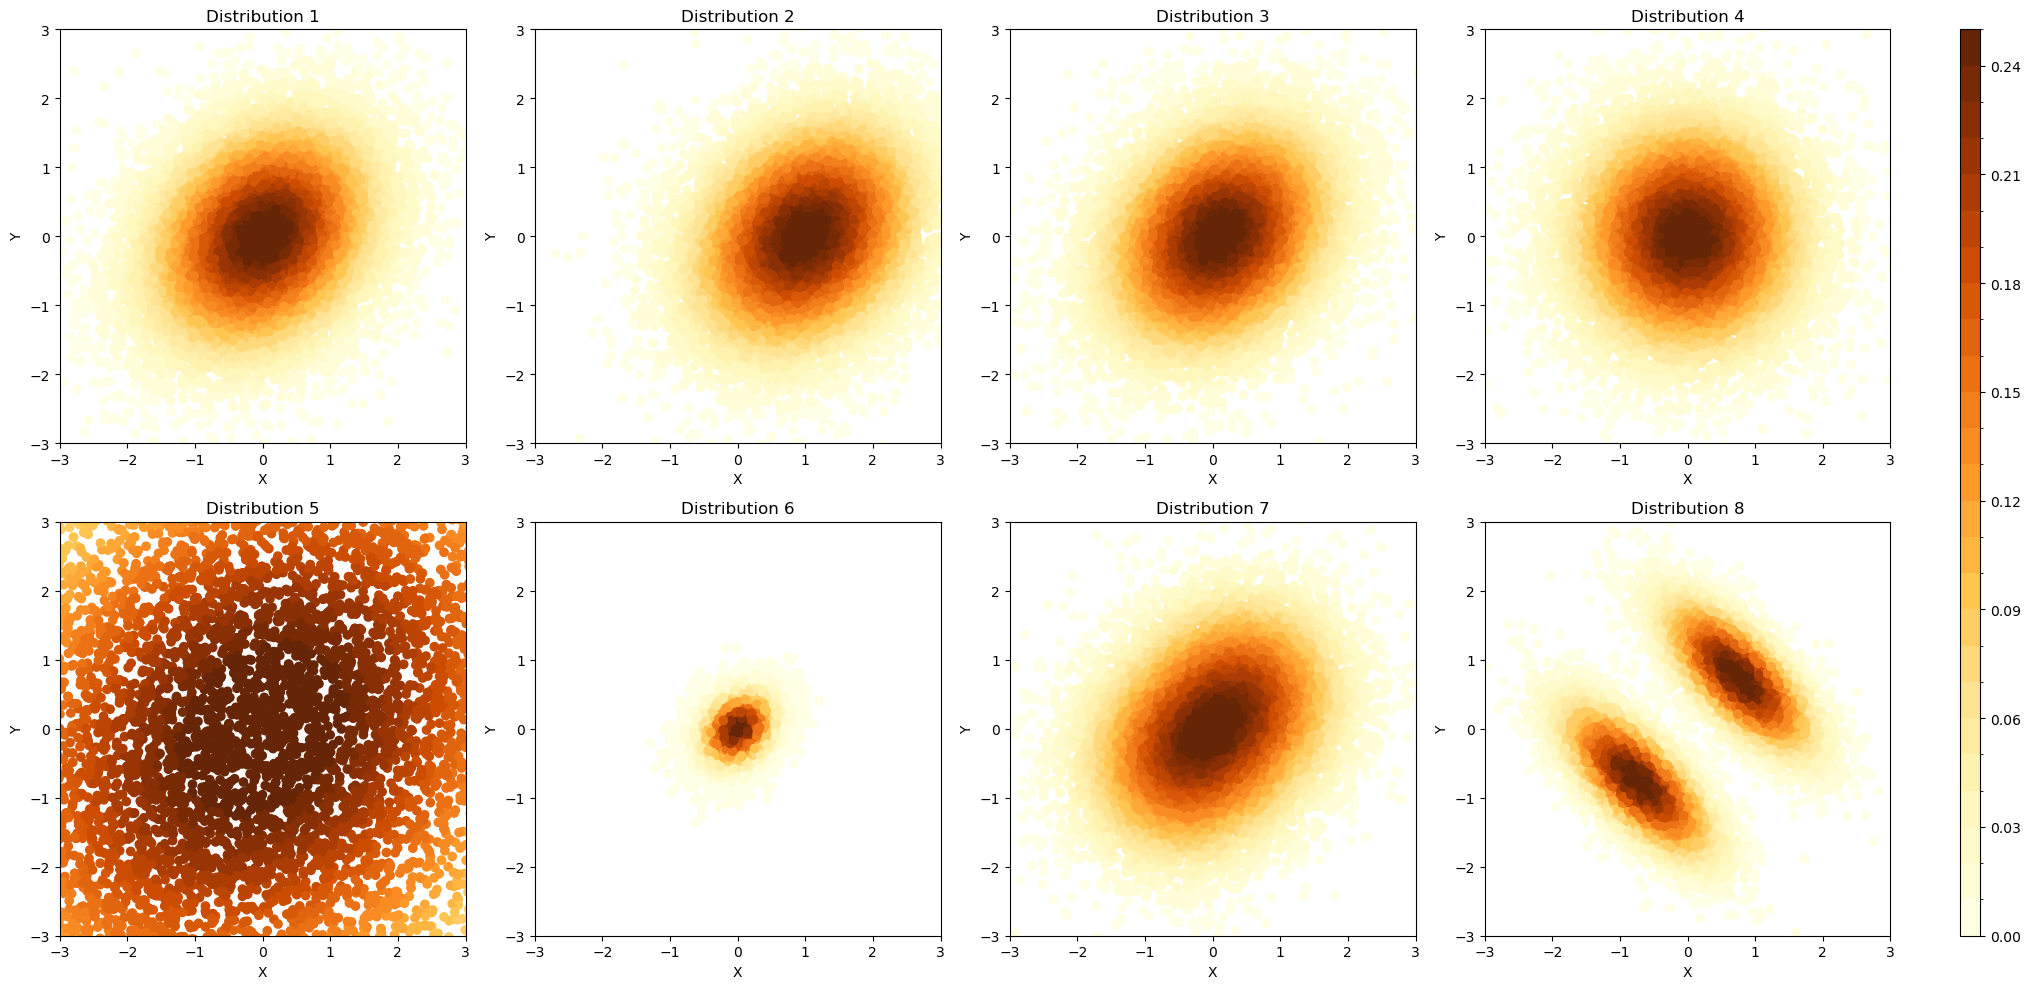

In [9]:
import matplotlib
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors

fig = plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
gs = gridspec.GridSpec(2, 5, width_ratios=[1, 1, 1, 1, 0.05])  # 2x3 grid for plots and 1 column for colorbar
ax = [fig.add_subplot(gs[i, j]) for i in range(2) for j in range(4)]

cmap_continuous = plt.cm.YlOrBr
#cmap_continuous = matplotlib.colormaps['YlOrBr']
#cmap_reversed = cmap_continuous.reversed()

# Discretize the colormap into n steps
n_steps = 25
bounds = np.linspace(0, 0.25, n_steps + 1)
norm = mcolors.BoundaryNorm(bounds, cmap_continuous.N)

for i, dist in enumerate(dist_list):
    #print(f"processing distribution {i+1}...")
    samples = dist.sample(10000)
    x = samples[:, 0].numpy().astype(np.float32)
    y = samples[:, 1].numpy().astype(np.float32)
    probabilities = dist.prob(samples).numpy().astype(np.float32)
    probabilities = (probabilities - probabilities.min()) / (probabilities.max() - probabilities.min()) * 0.26
    
    sc = ax[i].scatter(x, y, alpha=1, c=probabilities, cmap=cmap_continuous, norm=norm)
    ax[i].set_xlim(-3, 3)
    ax[i].set_ylim(-3, 3)
    ax[i].set_title(f'Distribution {i+1}')
    ax[i].set_xlabel('X')
    ax[i].set_ylabel('Y')
    
#Adjust layout
plt.tight_layout()

#Add a colorbar on the right side of the subplots
cbar_ax = plt.subplot(gs[:, -1])
fig.colorbar(sc, cax=cbar_ax)

plt.show()

## Bias estimation and metrics checks with 2211.10295

In [27]:
for nsamples in [25_000, 30_000, 35_000, 40_000, 45_000, 50_000]:
    print(f"\nnsamples = {nsamples}")
    TwoSampleTestInputs_0 = GMetrics.TwoSampleTestInputs(dist_1_input = dist_0,
                                                         dist_2_input = dist_0_null,
                                                         niter = 1,
                                                         batch_size_test = nsamples,
                                                         batch_size_gen = int(np.min([nsamples, 10_000])),
                                                         small_sample_threshold = 1e7,
                                                         dtype_input = tf.float64,
                                                         seed_input = 0,
                                                         use_tf = True,
                                                         mirror_strategy = False,
                                                         verbose = False)
    FPDMetric_0 = GMetrics.FPDMetric(TwoSampleTestInputs_0, max_samples=nsamples)
    s1 = FPDMetric_0.Inputs.dist_1_num[:nsamples].numpy()
    s2 = FPDMetric_0.Inputs.dist_2_num[:nsamples].numpy()
    for seed in range(1):
        print("Results with seed", seed)
        # Test with explicit custom function
        vals_list, batches_list = GMetrics.fpd_metrics.fpd_tf(s1, s2, max_samples=nsamples, seed=seed)#, min_samples=int(nsamples/10), max_samples=nsamples, num_batches=100)
        metric_list, metric_error_list = GMetrics.fpd_metrics.fpd_tf_fit([vals_list], [batches_list])
        print(f"result with explicit custom function: {metric_list}, {metric_error_list}")
        # Test with custom class
        FPDMetric_0.fpd_kwargs = {**FPDMetric_0.fpd_kwargs, "seed": seed}
        FPDMetric_0.Test_tf()
        metric_list = FPDMetric_0.Results[-1].result_value["metric_list"]
        metric_error_list = FPDMetric_0.Results[-1].result_value["metric_error_list"]
        print(f"result with custom class (tensorflow): {metric_list}, {metric_error_list}")
        FPDMetric_0.fpd_kwargs = {**FPDMetric_0.fpd_kwargs, "seed": seed}
        FPDMetric_0.Test_np()
        metric_list = FPDMetric_0.Results[-1].result_value["metric_list"]
        metric_error_list = FPDMetric_0.Results[-1].result_value["metric_error_list"]
        print(f"result with custom class (numpy): {metric_list}, {metric_error_list}")
        # Result with JetNet original code
        metric_list, metric_error_list = JMetrics.fpd(s1, s2, max_samples=nsamples, seed=seed)#, min_samples=int(nsamples/10), max_samples=nsamples, num_batches=100)
        print(f"result with JetNet original code: {metric_list}, {metric_error_list}")


nsamples = 25000


Results with seed 0
result with explicit custom function: [5.85448715e-05], [7.03911334e-05]
result with custom class (tensorflow): [5.85448715e-05], [7.03911334e-05]


/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/jetnet/evaluation/gen_metrics.py:692: RuntimeWarning: Recommended number of samples for FPD estimation is 50,000
  warnings.warn("Recommended number of samples for FPD estimation is 50,000", RuntimeWarning)


result with custom class (numpy): [5.76025129e-05], [7.40290426e-05]
result with JetNet original code: 5.760251293589778e-05, 7.402904260036221e-05

nsamples = 30000
Results with seed 0
result with explicit custom function: [5.3325755e-05], [4.47989639e-05]
result with custom class (tensorflow): [5.3325755e-05], [4.47989639e-05]
result with custom class (numpy): [5.16783623e-05], [4.71553766e-05]
result with JetNet original code: 5.16783622659581e-05, 4.71553765573676e-05

nsamples = 35000
Results with seed 0
result with explicit custom function: [4.86337779e-05], [3.72728205e-05]
result with custom class (tensorflow): [4.86337779e-05], [3.72728205e-05]
result with custom class (numpy): [4.73964699e-05], [4.0450724e-05]
result with JetNet original code: 4.7396469949914614e-05, 4.0450723977301964e-05

nsamples = 40000
Results with seed 0
result with explicit custom function: [4.18721685e-05], [3.68892679e-05]
result with custom class (tensorflow): [4.18721685e-05], [3.68892679e-05]
resu

In [26]:
FPDMetric_0.fpd_kwargs

{'seed': 0}

In [16]:
ndims = 2
result = []
for nsamples in [10_000,20_000,50_000,100_000]:
    print("\n=====================================")
    print("nsamples:", nsamples)
    ns = nsamples**2 /(2*nsamples)
    TwoSampleTestInputs_0 = GMetrics.TwoSampleTestInputs(dist_1_input = dist_0,
                                                         dist_2_input = dist_0_null,
                                                         niter = 1,
                                                         batch_size_test = nsamples,
                                                         batch_size_gen = int(np.min([nsamples, 10_000])),
                                                         small_sample_threshold = 1e7,
                                                         dtype_input = tf.float64,
                                                         seed_input = 0,
                                                         use_tf = True,
                                                         mirror_strategy = False,
                                                         verbose = True)
    FNMetric_0 = GMetrics.FNMetric(TwoSampleTestInputs_0)
    KSTest_0 = GMetrics.KSTest(TwoSampleTestInputs_0)
    SKSTest_0 = GMetrics.SKSTest(TwoSampleTestInputs_0, nslices = 20, seed_slicing = 0)
    SWDMetric_0 = GMetrics.SWDMetric(TwoSampleTestInputs_0, nslices = 20, seed_slicing = 0)
    FPDMetric_0 = GMetrics.FPDMetric(TwoSampleTestInputs_0)#, min_samples = int(nsamples/3), max_samples = nsamples)
    KPDMetric_0 = GMetrics.KPDMetric(TwoSampleTestInputs_0)
    print("Computing metrics...")
    FNMetric_0.Test_tf()
    KSTest_0.Test_tf()
    SKSTest_0.Test_tf()
    SWDMetric_0.Test_tf()
    FPDMetric_0.Test_tf()
    KPDMetric_0.Test_tf()
    fn_value = np.mean(FNMetric_0.Results[-1].result_value["metric_list"])
    ks_value = np.mean(KSTest_0.Results[-1].result_value["statistic_means"])*np.sqrt(ns)
    sks_value = np.mean(SKSTest_0.Results[-1].result_value["metric_means"])*np.sqrt(ns)
    swd_value = np.mean(SWDMetric_0.Results[-1].result_value["metric_means"])
    s1 = dist_0.sample(nsamples).numpy()
    s2 = dist_0_null.sample(nsamples).numpy()
    fpd_value = np.mean(FPDMetric_0.Results[-1].result_value["metric_list"])
    #vals_list, batches_list = GMetrics.fpd_metrics.fpd_tf(s1, s2)#, min_samples = int(nsamples/3), max_samples = nsamples
    #metric_list, metric_error_list = GMetrics.fpd_metrics.fpd_tf_fit([vals_list], [batches_list])
    #fpd_value = np.mean(metric_list)
    fpd_orig = JMetrics.fpd(s1, s2)[0]#, min_samples = int(nsamples/3), max_samples = nsamples)[0]
    kpd_value = np.mean(KPDMetric_0.Results[-1].result_value["metric_list"])
    #vals_list = GMetrics.kpd_metrics.kpd_tf(s1, s2)#, batch_size = int(np.min([nsamples/10,5000])))
    #metric_list, metric_error_list = GMetrics.kpd_metrics.kpd_tf_output(vals_list)
    #kpd_value = np.mean(metric_list)
    kpd_orig = JMetrics.kpd(s1, s2)[0]#, batch_size = int(np.min([nsamples/10,5000])))[0]
    result.append([nsamples, fn_value, ks_value, sks_value, swd_value, fpd_value, fpd_orig, kpd_value, kpd_orig])
result = np.array(result)


nsamples: 10000
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Setting dist_num from dist_symb.
Setting dist_num from dist_symb.
Computing metrics...


/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/jetnet/evaluation/gen_metrics.py:692: RuntimeWarning: Recommended number of samples for FPD estimation is 50,000
  warnings.warn("Recommended number of samples for FPD estimation is 50,000", RuntimeWarning)



nsamples: 20000
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Setting dist_num from dist_symb.
Setting dist_num from dist_symb.
Computing metrics...


/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/jetnet/evaluation/gen_metrics.py:692: RuntimeWarning: Recommended number of samples for FPD estimation is 50,000
  warnings.warn("Recommended number of samples for FPD estimation is 50,000", RuntimeWarning)



nsamples: 50000
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Setting dist_num from dist_symb.
Setting dist_num from dist_symb.
Computing metrics...

nsamples: 100000
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Setting dist_num from dist_symb.
Setting dist_num from dist_symb.
Computing metrics...


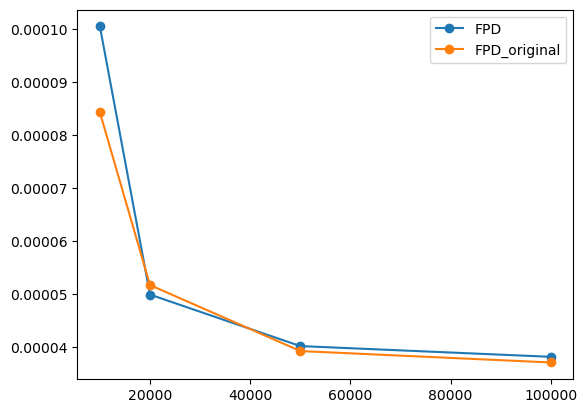

In [17]:
plt.plot(result[:,0], result[:,5], label="FPD", marker='o')
plt.plot(result[:,0], result[:,6], label="FPD_original", marker='o')
#plt.xscale("log")
#plt.yscale("log")
plt.legend()
plt.show()

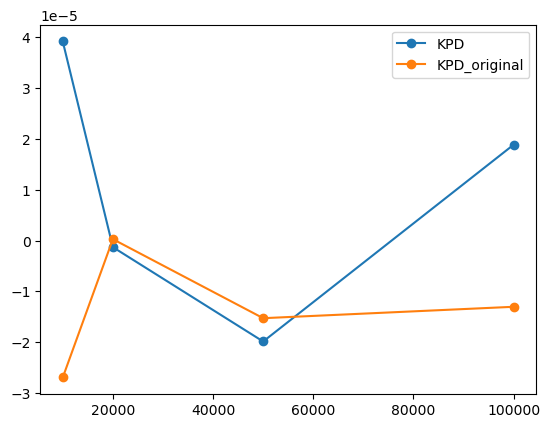

In [18]:
plt.plot(result[:,0], result[:,7], label="KPD", marker='o')
plt.plot(result[:,0], result[:,8], label="KPD_original", marker='o')
#plt.xscale("log")
#plt.yscale("log")
plt.legend()
plt.show()

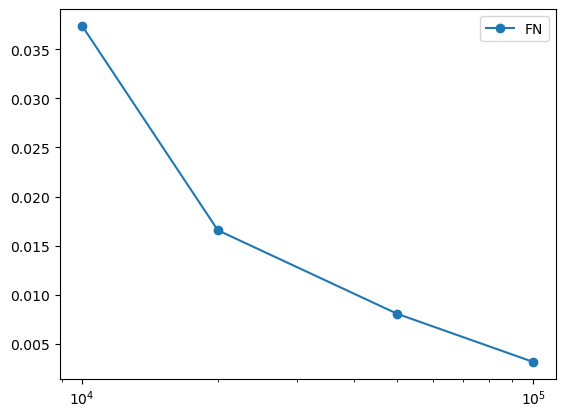

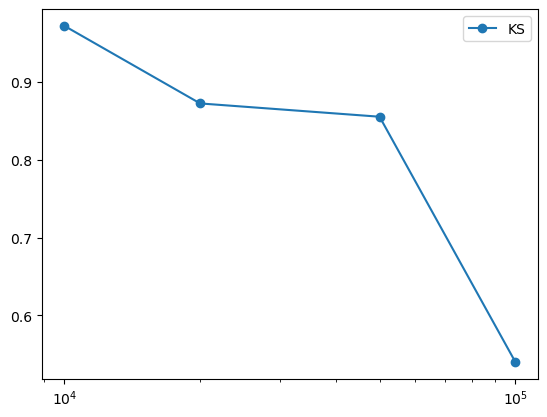

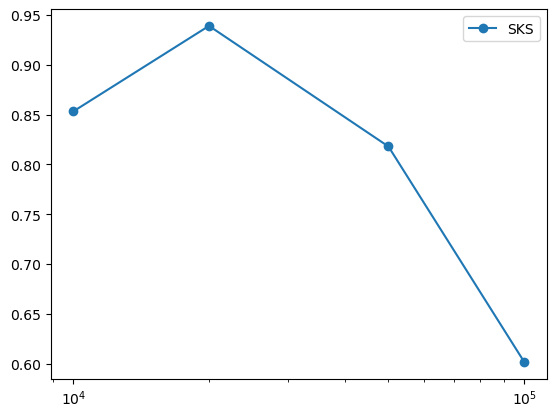

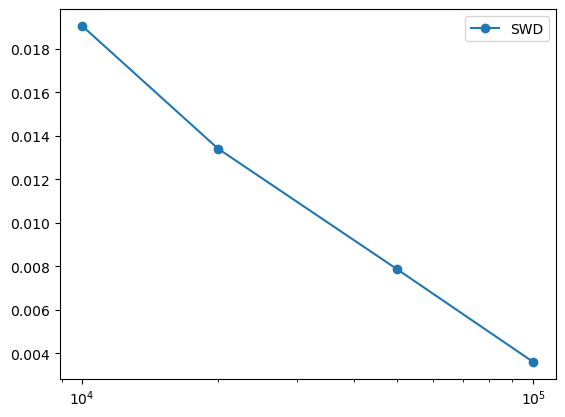

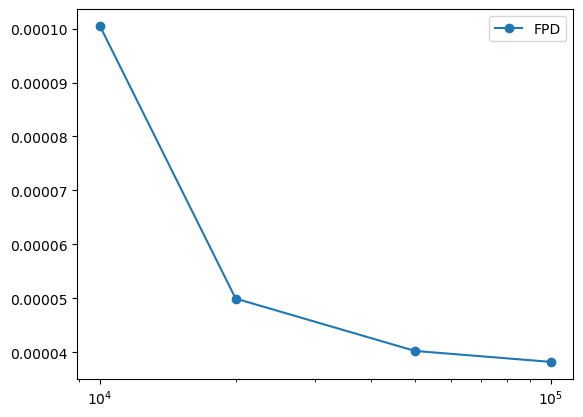

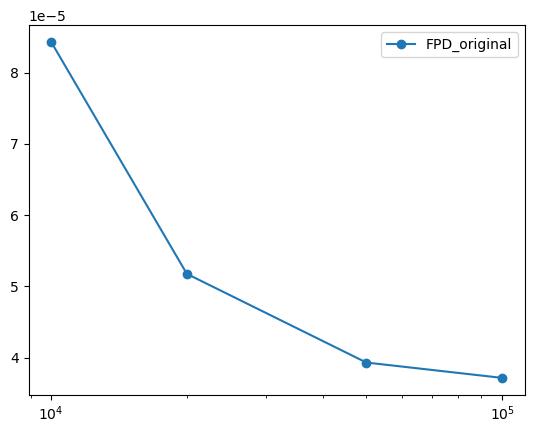

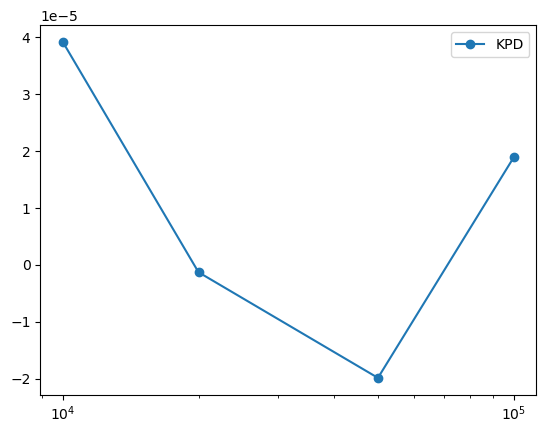

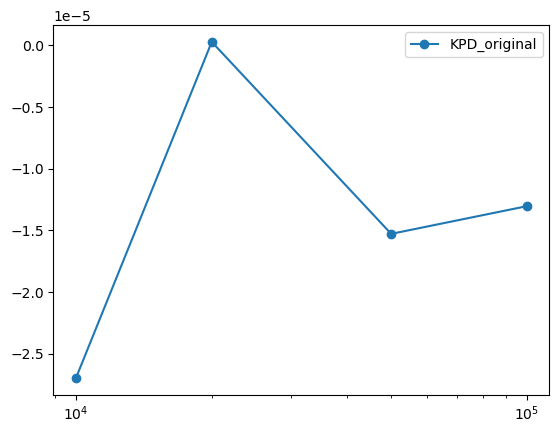

In [19]:
labels = ["FN", "KS", "SKS", "SWD", "FPD", "FPD_original", "KPD", "KPD_original"]
for i in range(1,len(result[0])):
    plt.plot(result[:,0], result[:,i], label=labels[i-1], marker='o')
    #if i == 2 or i == 3:
    #    plt.plot(result[:,0], result[:,i]/np.sqrt(result[:,0]), label=labels[i-1], marker='o')
    #else:
    #    plt.plot(result[:,0], result[:,i], label=labels[i-1], marker='o')
    plt.xscale("log")
    #plt.yscale("log")
    plt.legend()
    plt.show()

# Model 6 - Evaluation

In [10]:
def plot_dist(dist,
              nsamples,
              ndims, 
              dist_name = "dist"):
    start = timer()

    niter = len(dist)
    ns = nsamples**2 /(2*nsamples)

    scale = 'log'
    num_bins = 50  # number of bins|

    mu, deltamu, sigma, deltasigma = (np.mean(dist), se_mean(dist), np.std(dist), se_std(dist))
    print("mu =", mu, "+/-", deltamu)
    print("sigma =", sigma, "+/-", deltasigma)

    min_x = min(dist) # lower limit of the binning
    max_x = max(dist) # upper limit of the binning
    x = np.linspace(min_x, max_x, num_bins + 1)
    counts, bin_edges = np.histogram(dist, bins=x, density=True)
    cum_counts = np.cumsum(counts)/np.sum(counts)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))

    ax[0].plot(bin_centers, counts, linestyle = '-', label='Null Distribution', drawstyle='steps-mid')
    ax[0].set_yscale(scale)
    ax[0].set_xlabel(dist_name)
    ax[0].set_ylabel('Number of pseudo-experiments')
    ax[0].set_title('PDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
    ax[0].legend(loc='upper right')

    ax[1].plot(bin_centers, cum_counts, linestyle = '-', label='Null Distribution', drawstyle='steps-mid')
    ax[1].set_yscale(scale)
    ax[1].set_xlabel(dist_name)
    ax[1].set_title('CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
    ax[1].legend(loc='lower right')

    plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
    plt.tight_layout()
    plt.show()
    plt.close()
    end = timer()
    print(f"Plot made in {end - start} seconds")

Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.


Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Setting dist_num from dist_symb.
Setting dist_num from dist_symb.
Testing metrics...

--------------------------------
--------- FN Metric - Null hypothesis ---------
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
FN thresholds: [[0.68, [6800, 3199], 0.008221947862497907], [0.95, [9500, 500], 0.016570876477938118], [0.99, [9900, 100], 0.02184883401317363]] computed in 30.17416594736278 seconds

mu = 0.006664916028491901 +/- 2.573828993761711e-07
sigma = 0.0050732918246063 +/- 4.29231425346818e-05


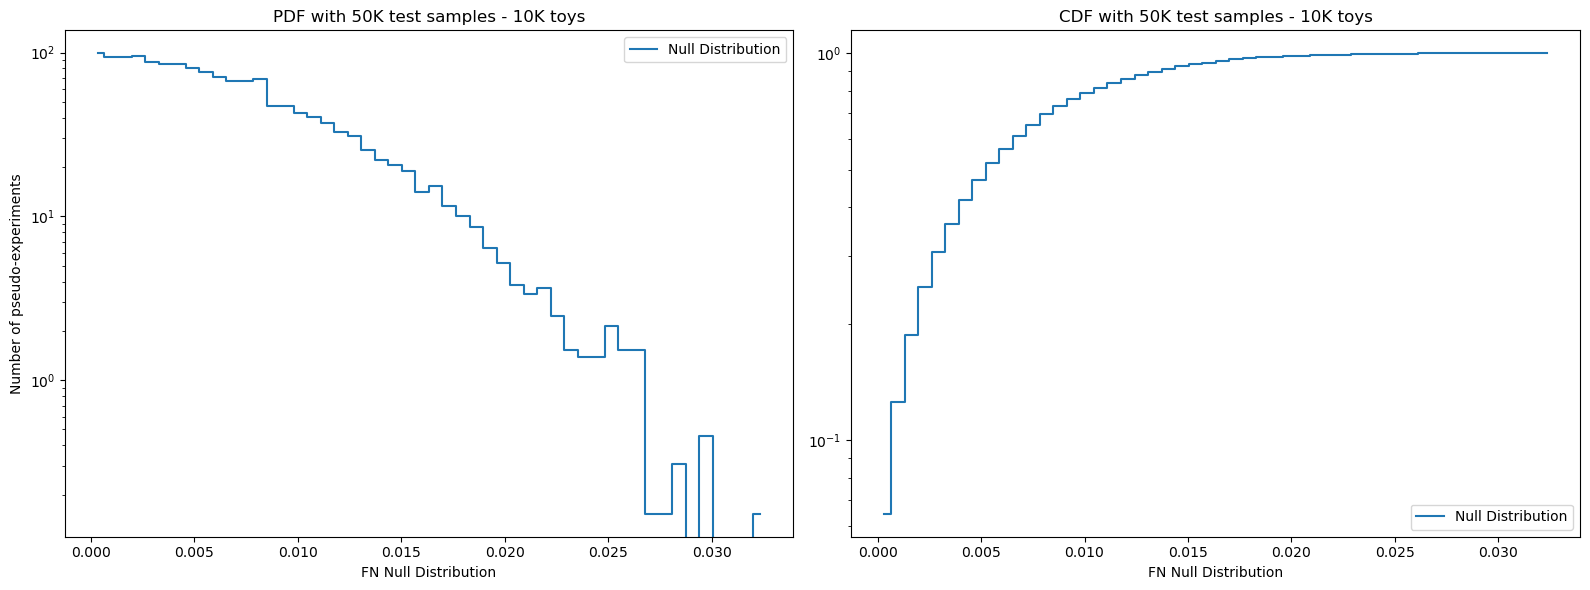

Plot made in 0.6012283693999052 seconds
--------- FN Metric - Alternative hypothesis ---------
FN value: 0.007416221780621755 +/- 0.006525655924584045
FN p-value (one-tailed) = 0.3742 computed in 0.6022570785135031 seconds


--------------------------------
--------- KS Test - Null hypothesis ---------
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
KS thresholds: [[0.68, [6800, 3199], 0.9344544946476979], [0.95, [9500, 500], 1.2048265075703295], [0.99, [9900, 100], 1.3834998690795253]] computed in 38.15257306396961 seconds

mu = 0.8661339211004091 +/- 0.00034429006324343124
sigma = 0.18555054924290343 +/- 0.001529804267709019


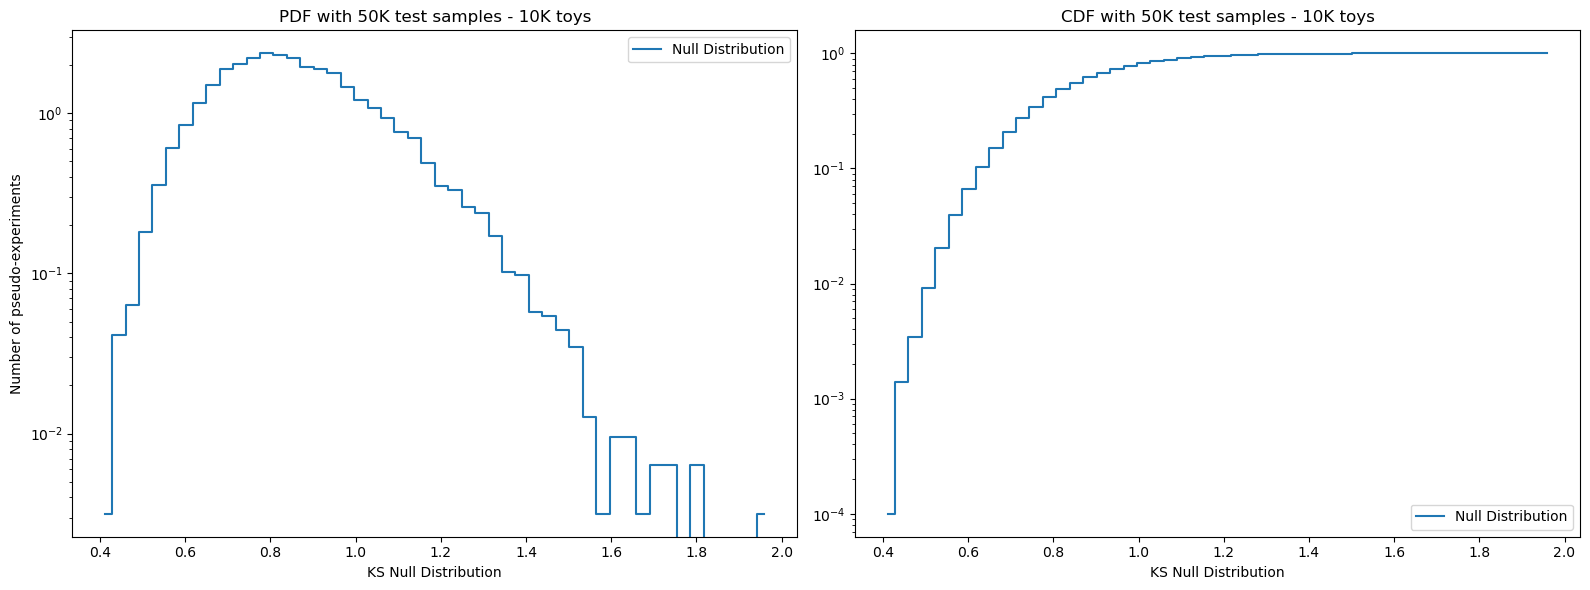

Plot made in 0.7133279256522655 seconds
--------- KS Test - Alternative hypothesis ---------
KS value: 1.1455358606564923 +/- 0.2098001899712117
KS p-value (one-tailed) = 0.0795 computed in 1.1721716485917568 seconds


--------------------------------
--------- SKS Test - Null hypothesis ---------
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
SKS thresholds: [[0.68, [6800, 3199], 0.9265478567692496], [0.95, [9500, 500], 1.1599245470901474], [0.99, [9900, 100], 1.3248365580385548]] computed in 369.87976298853755 seconds

mu = 0.8653627375809014 +/- 0.00026511605160241936
sigma = 0.16282384702567967 +/- 0.001323847807255211


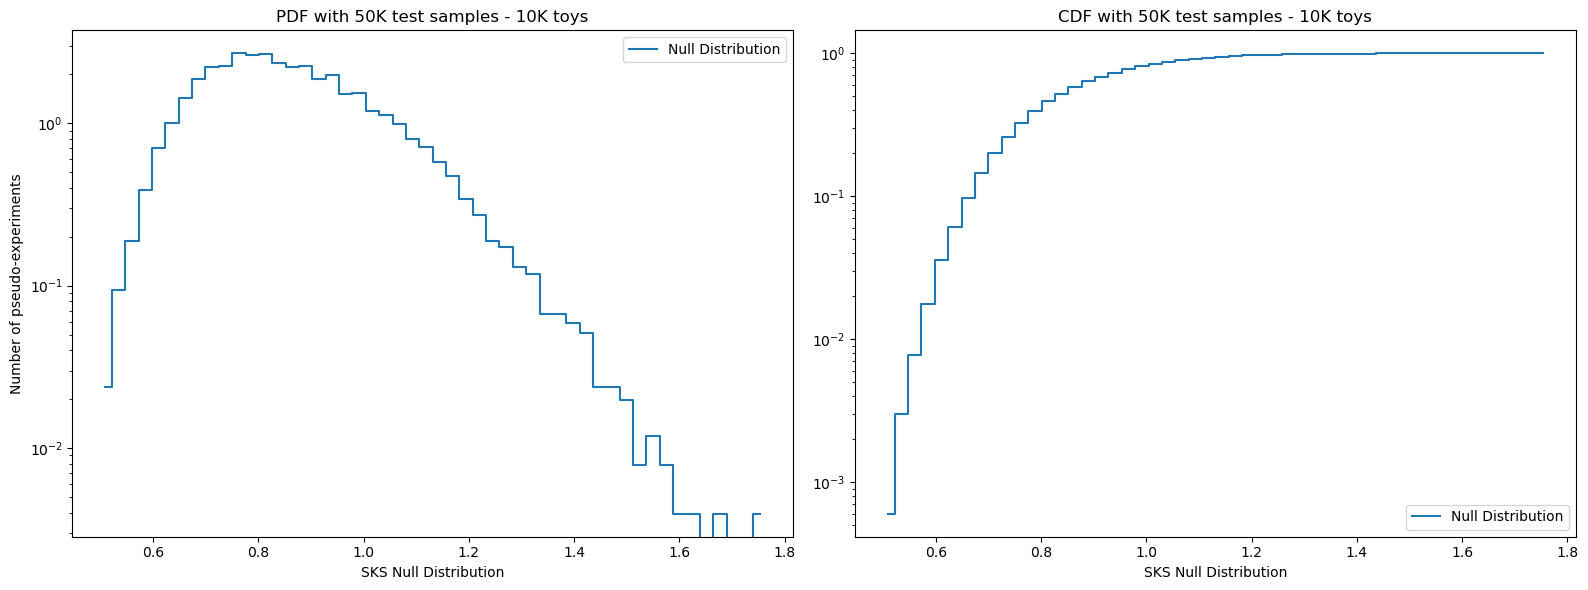

Plot made in 0.6225444320589304 seconds
--------- SKS Test - Alternative hypothesis ---------
SKS value: 1.43146926960959 +/- 0.14741649835841275
SKS p-value (one-tailed) = 0.0031 computed in 4.01552851870656 seconds


--------------------------------
--------- SWD Metric - Null hypothesis ---------
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
SWD thresholds: [[0.68, [6800, 3199], 0.008732093246341447], [0.95, [9500, 500], 0.011831637596351155], [0.99, [9900, 100], 0.01403010605836245]] computed in 115.02430701442063 seconds

mu = 0.008137875168433503 +/- 3.784204665630699e-08
sigma = 0.001945303232308706 +/- 1.9451461956596024e-05


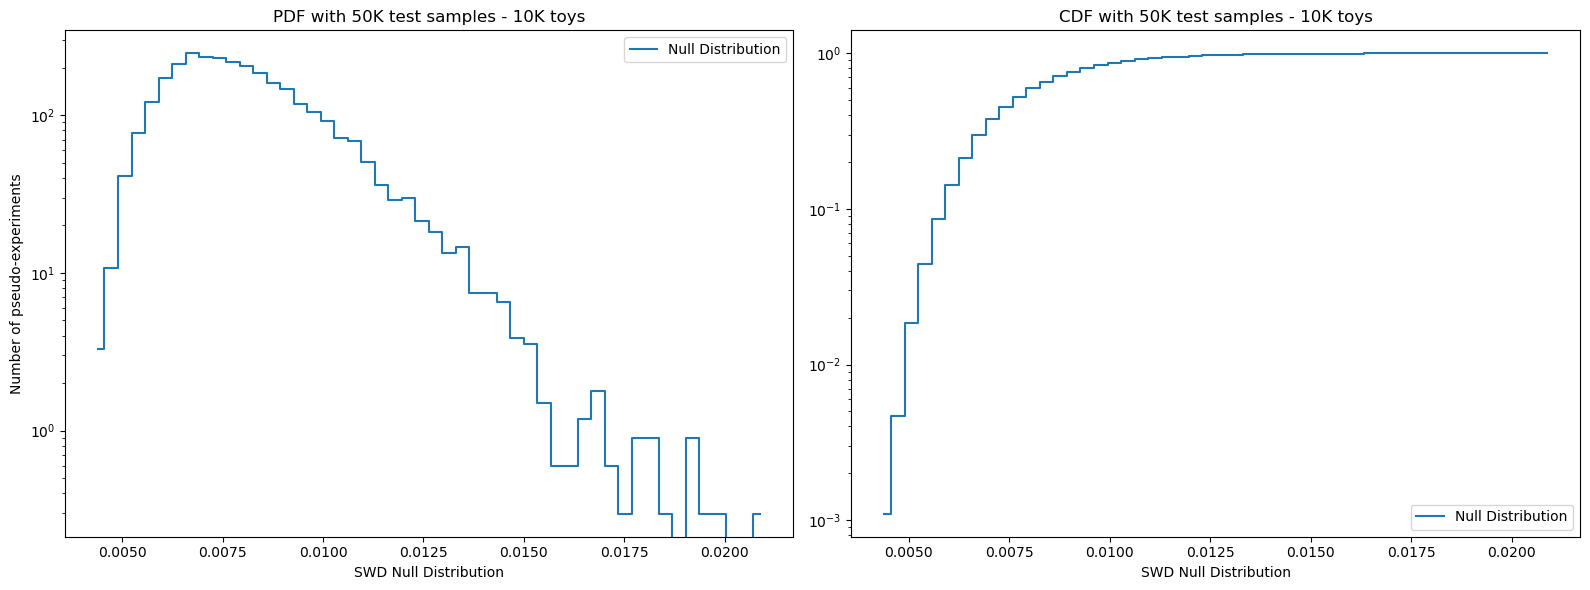

Plot made in 0.6283331587910652 seconds
--------- SWD Metric - Alternative hypothesis ---------
SWD value: 0.016799452506089413 +/- 0.001971008572334819
SWD p-value (one-tailed) = 0.0019 computed in 1.1370321176946163 seconds


--------------------------------
--------- FPD Metric - Null hypothesis ---------
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
FPD thresholds: [[0.68, [6800, 3199], 4.2472540773043494e-05], [0.95, [9500, 500], 4.803642549400559e-05], [0.99, [9900, 100], 5.2787333805353294e-05]] computed in 1176.282103434205 seconds

mu = 4.1720335687111944e-05 +/- 1.1234496859163079e-13
sigma = 3.351790097718394e-06 +/- 5.3113067808143897e-08


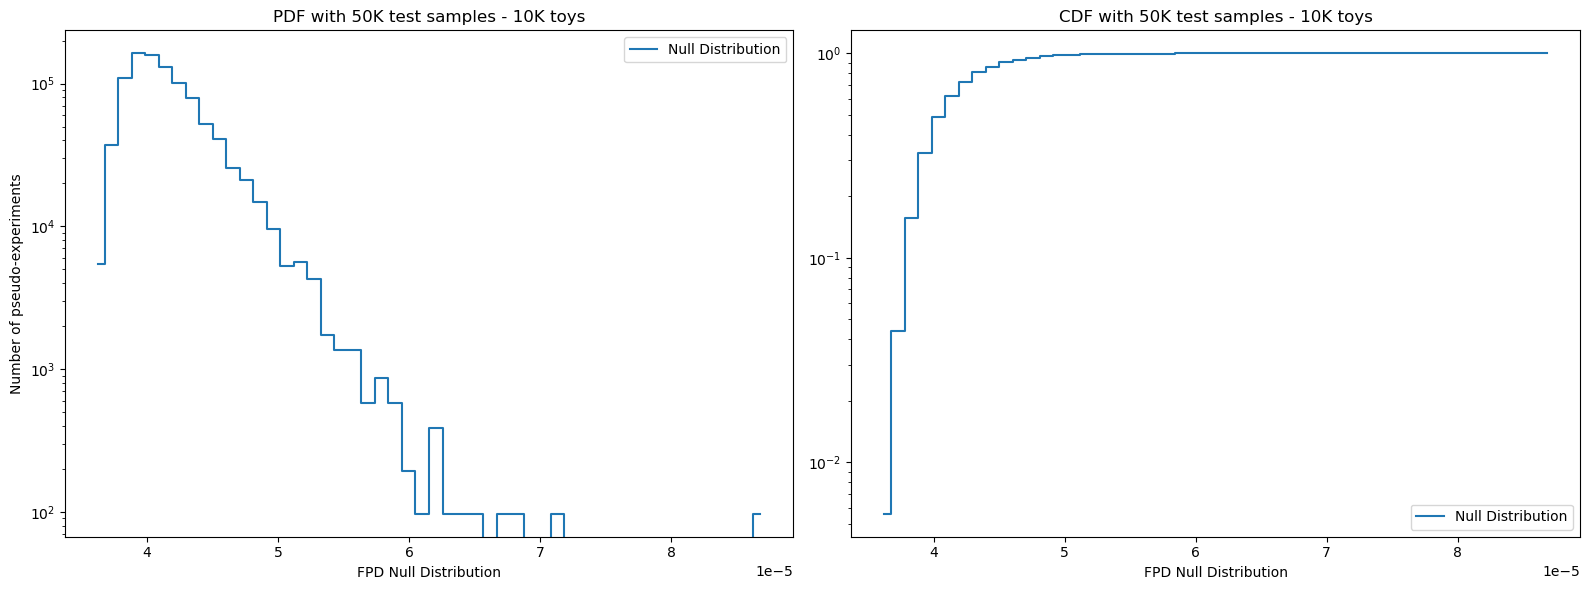

Plot made in 0.6230367850512266 seconds
--------- FPD Metric ---------
FPD value: 4.075406739593401e-05 +/- 2.3149763737066877e-06
FPD p-value (one-tailed) = 0.5321 computed in 6.268496569246054 seconds


--------------------------------
--------- KPD Metric - Null hypothesis ---------
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
KPD thresholds: [[0.68, [680, 319], -3.907820603776813e-06], [0.95, [950, 50], 4.204370112237399e-05], [0.99, [990, 10], 7.145025193722176e-05]] computed in 2852.5272823814303 seconds

mu = -1.4113060391223176e-05 +/- 2.8506014412285296e-11
sigma = 3.0023979176053205e-05 +/- 1.1107739610340885e-06


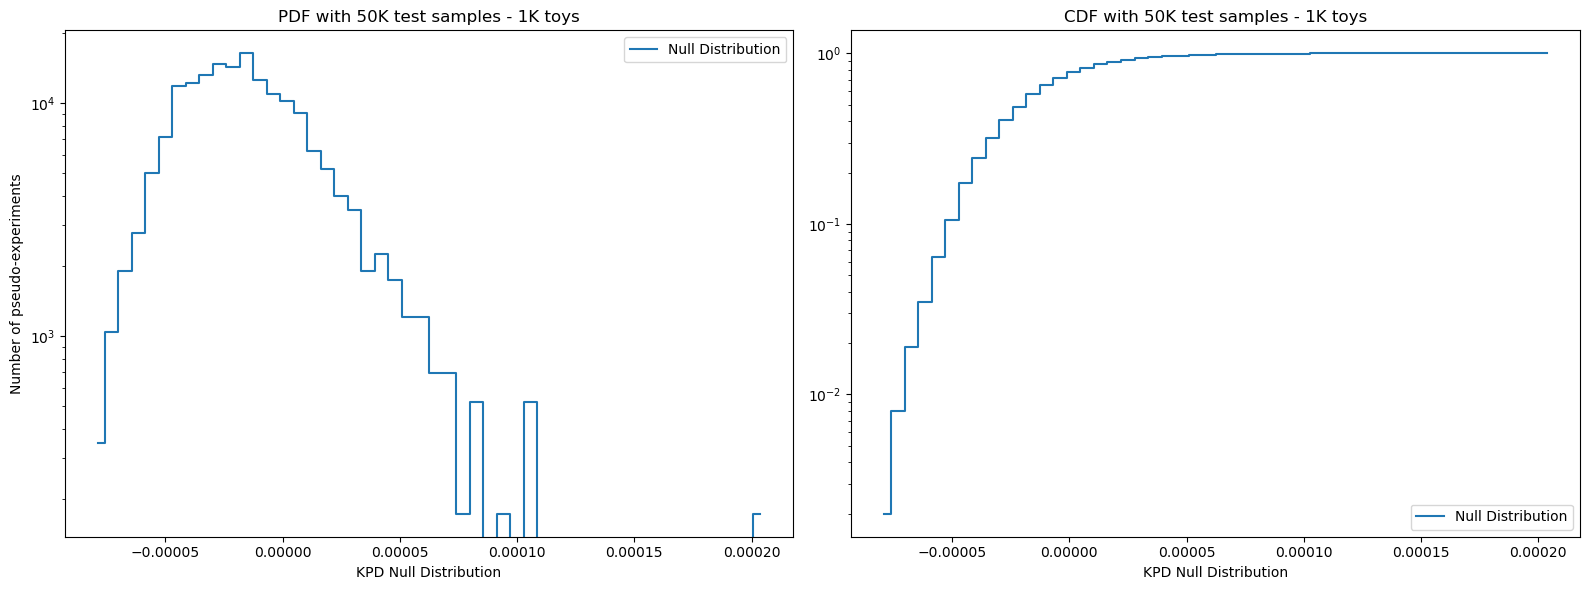

Plot made in 0.5697515644133091 seconds
--------- KPD Metric - Alternative hypothesis ---------
KPD value: -2.3424538068073097e-05 +/- 7.537844372416955e-06
KPD p-value (one-tailed) = 0.592 computed in 29.09154161065817 seconds

Total time: 4624.072812285274 seconds



In [11]:
nsamples = 50_000
ns = nsamples**2 /(2*nsamples)
ndims = 2
cl_list = [0.68, 0.95, 0.99]

TwoSampleTestInputs_0 = GMetrics.TwoSampleTestInputs(dist_1_input = dist_0,
                                                     dist_2_input = dist_0_null,
                                                     niter = 1_000,
                                                     batch_size_test = nsamples,
                                                     batch_size_gen = int(np.min([nsamples, 10_000])),
                                                     small_sample_threshold = 1e7,
                                                     dtype_input = tf.float64,
                                                     seed_input = 0,
                                                     use_tf = True,
                                                     mirror_strategy = False,
                                                     verbose = True)
TwoSampleTestInputs_1 = GMetrics.TwoSampleTestInputs(dist_1_input = dist_0,
                                                     dist_2_input = dist_6,
                                                     niter = 10,
                                                     batch_size_test = nsamples,
                                                     batch_size_gen = int(np.min([nsamples, 10_000])),
                                                     small_sample_threshold = 1e7,
                                                     dtype_input = tf.float64,
                                                     seed_input = 0,
                                                     use_tf = True,
                                                     mirror_strategy = False,
                                                     verbose = True)

FNMetric_0 = GMetrics.FNMetric(TwoSampleTestInputs_0)
KSTest_0 = GMetrics.KSTest(TwoSampleTestInputs_0)
SKSTest_0 = GMetrics.SKSTest(TwoSampleTestInputs_0, nslices = 20, seed_slicing = 0)
SWDMetric_0 = GMetrics.SWDMetric(TwoSampleTestInputs_0, nslices = 20, seed_slicing = 0)
FPDMetric_0 = GMetrics.FPDMetric(TwoSampleTestInputs_0)
KPDMetric_0 = GMetrics.KPDMetric(TwoSampleTestInputs_0)

FNMetric_1 = GMetrics.FNMetric(TwoSampleTestInputs_1)
KSTest_1 = GMetrics.KSTest(TwoSampleTestInputs_1)
SKSTest_1 = GMetrics.SKSTest(TwoSampleTestInputs_1, nslices = 20, seed_slicing = 0)
SWDMetric_1 = GMetrics.SWDMetric(TwoSampleTestInputs_1, nslices = 20, seed_slicing = 0)
FPDMetric_1 = GMetrics.FPDMetric(TwoSampleTestInputs_1)
KPDMetric_1 = GMetrics.KPDMetric(TwoSampleTestInputs_1)

print("================================")   
print("Testing metrics...")
start_global = timer()

print("\n--------------------------------")
print("--------- FN Metric - Null hypothesis ---------")
start = timer()
FNMetric_0.Inputs.niter = 10_000
FNMetric_0.Test_tf(max_vectorize = 2_000)
fn_dist_null = np.array(FNMetric_0.Results[-1].result_value["metric_list"])#*np.sqrt(ns)/ndims
fn_thresholds = [[cl, [int(cl*len(fn_dist_null)), int((1-cl)*len(fn_dist_null))], np.sort(fn_dist_null)[int(len(fn_dist_null)*cl)]] for cl in cl_list]
end = timer()
print(f"FN thresholds: {fn_thresholds} computed in {end-start} seconds\n")
plot_dist(fn_dist_null,
          nsamples,
          ndims, 
          dist_name = "FN Null Distribution")
print("--------- FN Metric - Alternative hypothesis ---------")
start = timer()
FNMetric_1.Test_tf(max_vectorize = 2_000)
fn_value = np.mean(FNMetric_1.Results[-1].result_value["metric_list"])
fn_value_error = np.std(FNMetric_1.Results[-1].result_value["metric_list"])
print(f"FN value: {fn_value} +/- {fn_value_error}")
p_value_one_tailed = np.mean(fn_dist_null > fn_value)
end = timer()
if p_value_one_tailed > 0:
    print(f"FN p-value (one-tailed) = {p_value_one_tailed} computed in {end-start} seconds\n")
else:
    print(f"FN p-value (one-tailed) < {1/len(fn_dist_null)} computed in {end-start} seconds\n")

print("\n--------------------------------")
print("--------- KS Test - Null hypothesis ---------")
start = timer()
KSTest_0.Inputs.niter = 10_000
KSTest_0.Test_tf(max_vectorize=5_000)
ks_dist_null = np.array(KSTest_0.Results[-1].result_value["statistic_means"])*np.sqrt(ns)
ks_thresholds = [[cl, [int(cl*len(ks_dist_null)), int((1-cl)*len(ks_dist_null))], np.sort(ks_dist_null)[int(len(ks_dist_null)*cl)]] for cl in cl_list]
end = timer()
print(f"KS thresholds: {ks_thresholds} computed in {end-start} seconds\n")
plot_dist(ks_dist_null,
          nsamples,
          ndims,
          dist_name = "KS Null Distribution")
print("--------- KS Test - Alternative hypothesis ---------")
start = timer()
KSTest_1.Test_tf(max_vectorize=5_000)
ks_value = np.mean(KSTest_1.Results[-1].result_value["statistic_means"])*np.sqrt(ns)
ks_value_error = np.std(KSTest_1.Results[-1].result_value["statistic_means"])*np.sqrt(ns)
print(f"KS value: {ks_value} +/- {ks_value_error}")
p_value_one_tailed = np.mean(ks_dist_null > ks_value)
end = timer()
if p_value_one_tailed > 0:
    print(f"KS p-value (one-tailed) = {p_value_one_tailed} computed in {end-start} seconds\n")
else:
    print(f"KS p-value (one-tailed) < {1/len(ks_dist_null)} computed in {end-start} seconds\n")

print("\n--------------------------------")
print("--------- SKS Test - Null hypothesis ---------")
start = timer()
KSTest_0.Inputs.niter = 10_000
SKSTest_0.Test_tf(max_vectorize=200)
sks_dist_null = np.array(SKSTest_0.Results[-1].result_value["metric_means"])*np.sqrt(ns)
sks_thresholds = [[cl, [int(cl*len(sks_dist_null)), int((1-cl)*len(sks_dist_null))], np.sort(sks_dist_null)[int(len(sks_dist_null)*cl)]] for cl in cl_list]
end = timer()
print(f"SKS thresholds: {sks_thresholds} computed in {end-start} seconds\n")
plot_dist(sks_dist_null,
            nsamples,
            ndims,
            dist_name = "SKS Null Distribution")
print("--------- SKS Test - Alternative hypothesis ---------")
start = timer()
SKSTest_1.Test_tf(max_vectorize=200)
sks_value = np.mean(SKSTest_1.Results[-1].result_value["metric_means"])*np.sqrt(ns)
sks_value_error = np.std(SKSTest_1.Results[-1].result_value["metric_means"])*np.sqrt(ns)
print(f"SKS value: {sks_value} +/- {sks_value_error}")
p_value_one_tailed = np.mean(sks_dist_null > sks_value)
end = timer()
if p_value_one_tailed > 0:
    print(f"SKS p-value (one-tailed) = {p_value_one_tailed} computed in {end-start} seconds\n")
else:
    print(f"SKS p-value (one-tailed) < {1/len(sks_dist_null)} computed in {end-start} seconds\n")

print("\n--------------------------------")
print("--------- SWD Metric - Null hypothesis ---------")
SWDMetric_0.Inputs.niter = 10_000
SWDMetric_0.Test_tf(max_vectorize=1_000)
swd_dist_null = np.array(SWDMetric_0.Results[-1].result_value["metric_means"])#*np.sqrt(ns/ndims)
swd_thresholds = [[cl, [int(cl*len(swd_dist_null)), int((1-cl)*len(swd_dist_null))], np.sort(swd_dist_null)[int(len(swd_dist_null)*cl)]] for cl in cl_list]
end = timer()
print(f"SWD thresholds: {swd_thresholds} computed in {end-start} seconds\n")
plot_dist(swd_dist_null,
            nsamples,
            ndims,
            dist_name = "SWD Null Distribution")
print("--------- SWD Metric - Alternative hypothesis ---------")
start = timer()
SWDMetric_1.Test_tf(max_vectorize=1000)
swd_value = np.mean(SWDMetric_1.Results[-1].result_value["metric_means"])
swd_value_error = np.std(SWDMetric_1.Results[-1].result_value["metric_means"])
print(f"SWD value: {swd_value} +/- {swd_value_error}")
p_value_one_tailed = np.mean(swd_dist_null > swd_value)
end = timer()
if p_value_one_tailed > 0:
    print(f"SWD p-value (one-tailed) = {p_value_one_tailed} computed in {end-start} seconds\n")
else:
    print(f"SWD p-value (one-tailed) < {1/len(swd_dist_null)} computed in {end-start} seconds\n")

print("\n--------------------------------")
print("--------- FPD Metric - Null hypothesis ---------")
start = timer()
FPDMetric_0.Inputs.niter = 10_000
FPDMetric_0.Test_tf(max_vectorize=80)
fpd_dist_null = np.array(FPDMetric_0.Results[-1].result_value["metric_list"])#*(ns/ndims)**(3/2)
fpd_thresholds = [[cl, [int(cl*len(fpd_dist_null)), int((1-cl)*len(fpd_dist_null))], np.sort(fpd_dist_null)[int(len(fpd_dist_null)*cl)]] for cl in cl_list]
end = timer()
print(f"FPD thresholds: {fpd_thresholds} computed in {end-start} seconds\n")
plot_dist(fpd_dist_null,
            nsamples,
            ndims,
            dist_name = "FPD Null Distribution")
print("--------- FPD Metric ---------")
start = timer()
FPDMetric_1.Test_tf(max_vectorize=100)
fpd_value = np.mean(FPDMetric_1.Results[-1].result_value["metric_list"])
fpd_value_error = np.std(FPDMetric_1.Results[-1].result_value["metric_list"])
print(f"FPD value: {fpd_value} +/- {fpd_value_error}")
p_value_one_tailed = np.mean(fpd_dist_null > fpd_value)
end = timer()
if p_value_one_tailed > 0:
    print(f"FPD p-value (one-tailed) = {p_value_one_tailed} computed in {end-start} seconds\n")
else:
    print(f"FPD p-value (one-tailed) < {1/len(fpd_dist_null)} computed in {end-start} seconds\n")

print("\n--------------------------------")
print("--------- KPD Metric - Null hypothesis ---------")
start = timer()
KPDMetric_0.Inputs.niter = 1_000
KPDMetric_0.Test_tf(max_vectorize=2)
kpd_dist_null = np.array(KPDMetric_0.Results[-1].result_value["metric_list"])#*ns/np.sqrt(ndims)
kpd_thresholds = [[cl, [int(cl*len(kpd_dist_null)), int((1-cl)*len(kpd_dist_null))], np.sort(kpd_dist_null)[int(len(kpd_dist_null)*cl)]] for cl in cl_list]
end = timer()
print(f"KPD thresholds: {kpd_thresholds} computed in {end-start} seconds\n")
plot_dist(kpd_dist_null,
            nsamples,
            ndims,
            dist_name = "KPD Null Distribution")
print("--------- KPD Metric - Alternative hypothesis ---------")
start = timer()
KPDMetric_1.Test_tf(max_vectorize=2)
kpd_value = np.mean(KPDMetric_1.Results[-1].result_value["metric_list"])
kp_value_error = np.std(KPDMetric_1.Results[-1].result_value["metric_list"])
print(f"KPD value: {kpd_value} +/- {kp_value_error}")
p_value_one_tailed = np.mean(kpd_dist_null > kpd_value)
end = timer()
if p_value_one_tailed > 0:
    print(f"KPD p-value (one-tailed) = {p_value_one_tailed} computed in {end-start} seconds\n")
else:
    print(f"KPD p-value (one-tailed) < {1/len(kpd_dist_null)} computed in {end-start} seconds\n")

end_global = timer()
print(f"Total time: {end_global-start_global} seconds\n")

# Old

In [6]:
print("--------- KPD Metric ---------")
KPDMetric_0.Test_tf(max_vectorize=10)
kpd_dist_null = np.array(KPDMetric_0.Results[-1].result_value["metric_list"])#*ns/np.sqrt(ndims)
kpd_thresholds = [[cl, [int(cl*len(kpd_dist_null)), int((1-cl)*len(kpd_dist_null))], np.sort(kpd_dist_null)[int(len(kpd_dist_null)*cl)]] for cl in cl_list]
print(f"KPD thresholds: {kpd_thresholds}")

--------- KPD Metric ---------


In [5]:
print("--------------------------------")
print("Computing alternative hypotheses...")

print("--------- FN Metric ---------")
FNMetric_1.Test_tf(max_vectorize = 10000)
fn_value = np.mean(FNMetric_1.Results[-1].result_value["metric_list"])
print(f"FN value: {fn_value}")
p_value_one_tailed = np.mean(fn_dist_null > fn_value)
print(f"FN p-value (one-tailed): {p_value_one_tailed}\n")

print("--------- KS Test ---------")
KSTest_1.Test_tf(max_vectorize=10000)
ks_value = np.mean(KSTest_1.Results[-1].result_value["statistic_means"])*np.sqrt(ns)
print(f"KS value: {ks_value}")
p_value_one_tailed = np.mean(ks_dist_null > ks_value)
print(f"KS p-value (one-tailed): {p_value_one_tailed}\n")

print("--------- SKS Test ---------")
SKSTest_1.Test_tf(max_vectorize=10000)
sks_value = np.mean(SKSTest_1.Results[-1].result_value["metric_means"])*np.sqrt(ns)
print(f"SKS value: {sks_value}")
p_value_one_tailed = np.mean(sks_dist_null > sks_value)
print(f"SKS p-value (one-tailed): {p_value_one_tailed}\n")

print("--------- SWD Metric ---------")
SWDMetric_1.Test_tf(max_vectorize=10000)
swd_value = np.mean(SWDMetric_1.Results[-1].result_value["metric_means"])
print(f"SWD value: {swd_value}")
p_value_one_tailed = np.mean(swd_dist_null > swd_value)
print(f"SWD p-value (one-tailed): {p_value_one_tailed}\n")

print("--------- FPD Metric ---------")
FPDMetric_1.Test_tf(max_vectorize=100)
fpd_value = np.mean(FPDMetric_1.Results[-1].result_value["metric_list"])
print(f"FPD value: {fpd_value}")
p_value_one_tailed = np.mean(fpd_dist_null > fpd_value)
print(f"FPD p-value (one-tailed): {p_value_one_tailed}\n")

print("--------- KPD Metric ---------")
KPDMetric_1.Test_tf(max_vectorize=4)
kpd_value = np.mean(KPDMetric_1.Results[-1].result_value["metric_list"])
print(f"KPD value: {kpd_value}")
p_value_one_tailed = np.mean(kpd_dist_null > kpd_value)
print(f"KPD p-value (one-tailed): {p_value_one_tailed}\n")

--------- KPD Metric ---------


KeyboardInterrupt: 

In [ ]:
#d1 = np.array(TwoSampleTestInputs.dist_1_num).reshape(TwoSampleTestInputs.niter,TwoSampleTestInputs.batch_size_test,-1)
#d2 = np.array(TwoSampleTestInputs.dist_2_num).reshape(TwoSampleTestInputs.niter,TwoSampleTestInputs.batch_size_test,-1)
#print("------------------------------------------")
#print("Starting FPD metric calculation...")
#print("Running Jetnet FPD calculation...")
#print("niter = 10")
#print("batch_size = 10000")
#start = timer()
#FPDResult = [JMetrics.fpd(s1,s2)[0] for s1,s2 in zip(d1,d2)]
#end = timer()
#print(f"FPD metric calculation completed in {end-start} seconds.")

## FN Test

In [ ]:
FNMetric.Test_tf(max_vectorize = 500)
FNMetric.Results[-1].result_value


------------------------------------------
Starting FN metric calculation...
Running TF FN calculation...
niter = 1000
batch_size = 100000


The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.
nchunks = 2
Iterating from 0 to 500 out of 1000 .
Iterating from 500 to 1000 out of 1000 .
FN metric calculation completed in 60.53157912008464 seconds.


{'metric_list': array([0.01653658, 0.02328025, 0.00861003, 0.01613184, 0.01087034,
        0.02231515, 0.00714418, 0.00893228, 0.02194505, 0.00455615,
        0.00631034, 0.01357107, 0.02822969, 0.02869016, 0.00939945,
        0.01976646, 0.00863126, 0.0144132 , 0.00824386, 0.01817625,
        0.00905525, 0.0295978 , 0.01552439, 0.01792205, 0.0298249 ,
        0.01878269, 0.03069906, 0.02067796, 0.0156176 , 0.00863282,
        0.00965763, 0.00823101, 0.01684671, 0.01120278, 0.01260707,
        0.0115816 , 0.01395425, 0.02219505, 0.01045646, 0.01502414,
        0.01955469, 0.00749113, 0.02173346, 0.02281415, 0.01232686,
        0.01154446, 0.00941182, 0.0295897 , 0.01507111, 0.01490791,
        0.01397536, 0.0098459 , 0.01796976, 0.00670141, 0.00991798,
        0.01679995, 0.01358125, 0.0124747 , 0.01042522, 0.01300145,
        0.00851881, 0.01330485, 0.00733616, 0.00673652, 0.00485235,
        0.01745092, 0.00561234, 0.00890174, 0.00918993, 0.01121898,
        0.01472504, 0.01251036, 0

In [ ]:
FNMetric.Results.save_to_json(null_hypotheses_dir+"Null_5D_FN.json")

In [ ]:
FNMetric.Results.load_from_json(null_hypotheses_dir+"Null_5D_FN.json")

mu = 0.6455493931289495 +/- 0.002365748266855417
sigma = 0.27351696279863424 +/- 0.007995293332642655


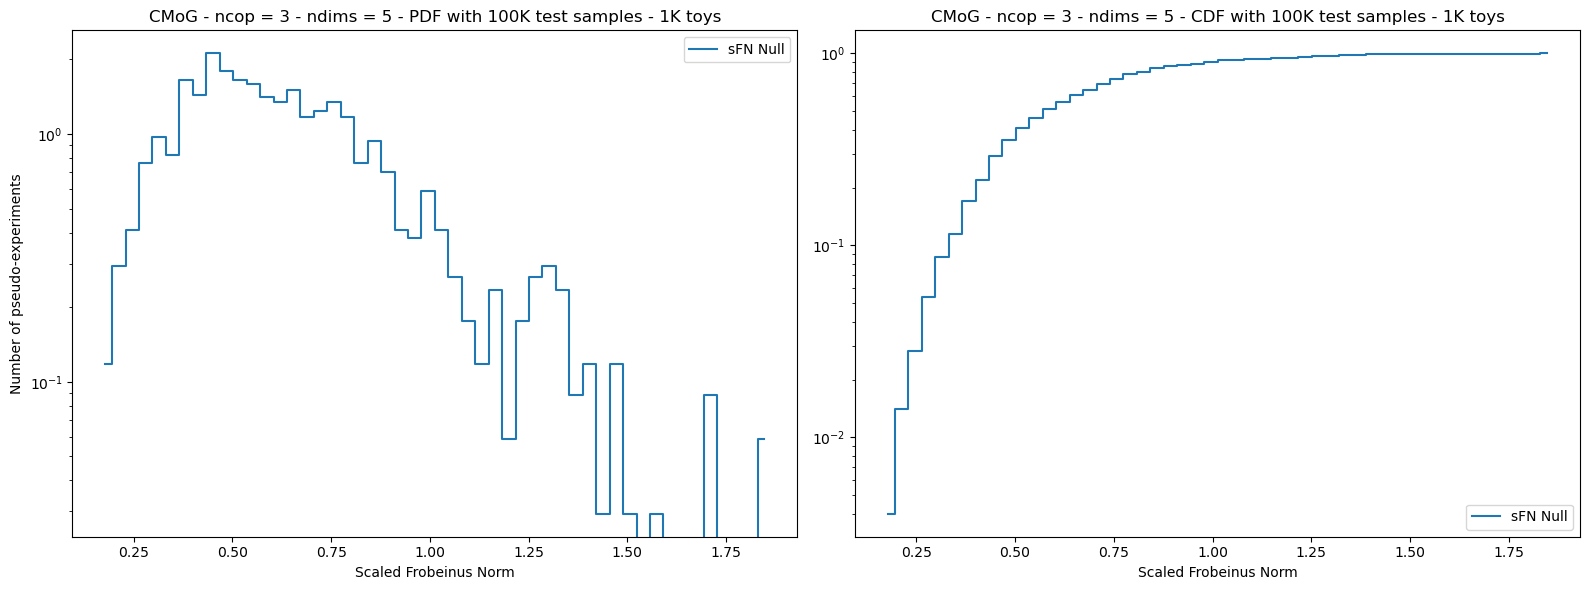

Time elapsed: 0.7177807483822107 seconds.


In [ ]:
start = timer()

nsamples = FNMetric.Inputs.batch_size_test
niter = FNMetric.Inputs.niter
ns = nsamples**2 /(2*nsamples)

scale = 'log'
num_bins = 50  # number of bins|
dist_null = np.array(FNMetric.Results[-1].result_value["metric_list"])*np.sqrt(ns)/ndims
# Compute the mean and standard deviation of the sample and their standard errors
mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
print("mu =", mu, "+/-", deltamu)
print("sigma =", sigma, "+/-", deltasigma)
# Minimum and maximum x values
min_x = min(dist_null) # lower limit of the binning
max_x = max(dist_null) # upper limit of the binning
# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)
# Create histogram for values and normalize counts to sum to 1
counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
cum_counts = np.cumsum(counts)/np.sum(counts)
# Get the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
# Calculate the theoretical PDF and CDF of the KS distribution for each x value
#theoretical_pdf_ks = kstwobign.pdf(x)
#theoretical_cdf_ks = kstwobign.cdf(x)

# Empirical SKS Normal
#empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=0.155)
#empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=0.155)
# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
# Draw the first plot
ax[0].plot(bin_centers, counts, linestyle = '-', label='sFN Null', drawstyle='steps-mid')
#ax[0].plot(x, theoretical_pdf_ks, label='Theoretical distribution (KS)')
#ax[0].plot(x, empirical_pdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[0].set_yscale(scale)
#ax[0].set_xlim(0.005, 0.2)
#ax[0].set_ylim(0.01, 40)
ax[0].set_xlabel('Scaled Frobeinus Norm')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - PDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[0].legend(loc='upper right')
# Draw the second plot
ax[1].plot(bin_centers, cum_counts, linestyle = '-', label='sFN Null', drawstyle='steps-mid')
#ax[1].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
#ax[1].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[1].set_yscale(scale)
#ax[1].set_xlim(0.005, 0.2)
#ax[1].set_ylim(9e-4, 1.5)
ax[1].set_xlabel('Scaled Frobeinus Norm')
ax[1].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[1].legend(loc='lower right')
## Draw the third plot
#ax[2].plot(bin_centers, cum_counts, linestyle = '-', label='FN Null', drawstyle='steps-mid')
##ax[2].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
##ax[2].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
#ax[2].set_yscale(scale)
#ax[2].set_xlim(0.25, 2)
#ax[2].set_ylim(0.8, 1)
#ax[2].set_xlabel('KS vs SKS')
#ax[2].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
#ax[2].legend(loc='lower right')
# Adjust the width space
plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
# Display the figure with the two subplots
plt.tight_layout()
#plt.savefig(results_path+'SKS_nsamples_'+str(nsamples)+'_ndims_'+'_'+str(ndims)+'_niter_'+str(niter)+'.pdf')
plt.show()
plt.close()
end = timer()
print("Time elapsed:", end-start, "seconds.")

In [ ]:
cl_list = [0.68, 0.95, 0.99]
fn_thresholds = [[cl, [int(cl*len(dist_null)), int((1-cl)*len(dist_null))], np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
fn_thresholds

[[0.68, [680, 319], 0.7331780002523476],
 [0.95, [950, 50], 1.2365268905752],
 [0.99, [990, 10], 1.4684991255333162]]

## KS Test

In [ ]:
KSTest.Test_tf(max_vectorize=1000)
KSTest.Results[-1].result_value


------------------------------------------
Starting KS tests calculation...
Running TF KS tests...
niter = 1000
batch_size = 100000


The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.
nchunks = 5
Iterating from 0 to 200 out of 1000 .
Iterating from 200 to 400 out of 1000 .
Iterating from 400 to 600 out of 1000 .
Iterating from 600 to 800 out of 1000 .
Iterating from 800 to 1000 out of 1000 .
KS tests calculation completed in 66.78333464823663 seconds.


{'statistic_lists': array([[0.00283003, 0.00747001, 0.00435001, 0.00506002, 0.00600001],
        [0.00340003, 0.00282001, 0.00229   , 0.00305   , 0.00405002],
        [0.00288999, 0.00318   , 0.00275001, 0.00433999, 0.00275004],
        ...,
        [0.00285   , 0.00265002, 0.00202   , 0.00489998, 0.0045    ],
        [0.00400001, 0.00419003, 0.00325996, 0.00457001, 0.00402999],
        [0.00329   , 0.00368999, 0.00426   , 0.00392002, 0.00408995]]),
 'statistic_means': array([0.00514202, 0.00312201, 0.00318201, 0.00393201, 0.00366401,
        0.00366401, 0.003764  , 0.00519001, 0.00430599, 0.00302001,
        0.00335001, 0.00454999, 0.00390801, 0.004366  , 0.003288  ,
        0.00357   , 0.00365801, 0.00355   , 0.004026  , 0.00423601,
        0.00504002, 0.00439201, 0.00482201, 0.00375399, 0.003622  ,
        0.00418801, 0.002798  , 0.00458801, 0.00415   , 0.00358998,
        0.00393401, 0.003072  , 0.00405001, 0.004016  , 0.00404601,
        0.00409202, 0.004432  , 0.00366001, 0.00435

In [ ]:
KSTest.Results.save_to_json(null_hypotheses_dir+"Null_5D_KS.json")

In [ ]:
KSTest.Results.load_from_json(null_hypotheses_dir+"Null_5D_KS.json")

mu = 0.8653478275497107 +/- 0.000746627549525717
sigma = 0.15365687815166085 +/- 0.004565960418894537


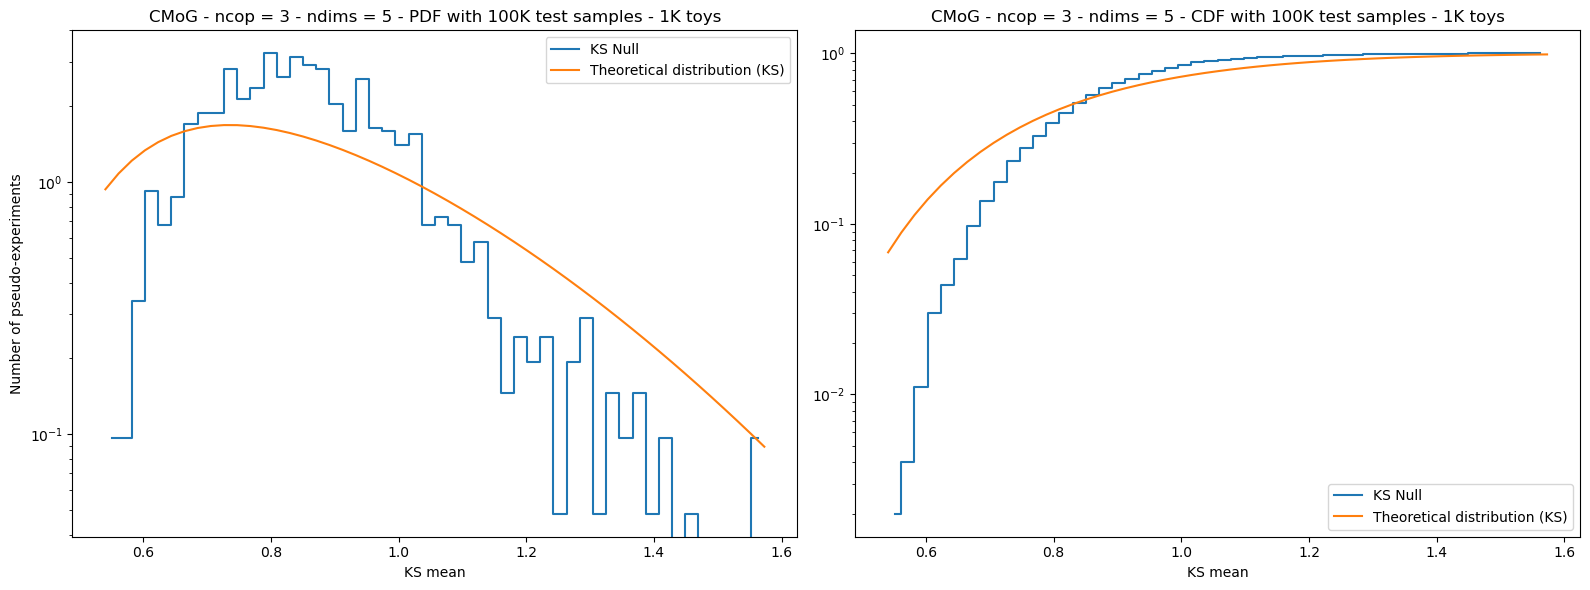

Time elapsed: 1.2980018462985754 seconds.


In [ ]:
start = timer()

nsamples = KSTest.Inputs.batch_size_test
niter = KSTest.Inputs.niter
ns = nsamples**2 /(2*nsamples)

scale = 'log'
num_bins = 50  # number of bins|
dist_null = np.array(KSTest.Results[-1].result_value["statistic_means"])*np.sqrt(ns)
# Compute the mean and standard deviation of the sample and their standard errors
mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
print("mu =", mu, "+/-", deltamu)
print("sigma =", sigma, "+/-", deltasigma)
# Minimum and maximum x values
min_x = min(dist_null) # lower limit of the binning
max_x = max(dist_null) # upper limit of the binning
# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)
# Create histogram for values and normalize counts to sum to 1
counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
cum_counts = np.cumsum(counts)/np.sum(counts)
# Get the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
# Calculate the theoretical PDF and CDF of the KS distribution for each x value
theoretical_pdf_ks = kstwobign.pdf(x)
theoretical_cdf_ks = kstwobign.cdf(x)

# Empirical SKS Normal
#shape_fit, loc_fit, scale_fit = lognorm.fit(bin_centers, floc=0)
#empirical_pdf_norm = lognorm.pdf(x, shape_fit, loc_fit, scale_fit)
#empirical_cdf_norm = lognorm.cdf(x, shape_fit, loc_fit, scale_fit)
empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
# Draw the first plot
ax[0].plot(bin_centers, counts, linestyle = '-', label='KS Null', drawstyle='steps-mid')
ax[0].plot(x, theoretical_pdf_ks, label='Theoretical distribution (KS)')
#ax[0].plot(x, empirical_pdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[0].set_yscale(scale)
#ax[0].set_xlim(0.005*np.sqrt(ns), 0.025*np.sqrt(ns))
#ax[0].set_ylim(0.01, 5)
ax[0].set_xlabel('KS mean')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - PDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[0].legend(loc='upper right')
# Draw the second plot
ax[1].plot(bin_centers, cum_counts, linestyle = '-', label='KS Null', drawstyle='steps-mid')
ax[1].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
#ax[1].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[1].set_yscale(scale)
#ax[1].set_xlim(0.005*np.sqrt(ns), 0.025*np.sqrt(ns))
#ax[1].set_ylim(9e-4, 1.5)
ax[1].set_xlabel('KS mean')
ax[1].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[1].legend(loc='lower right')
## Draw the third plot
#ax[2].plot(bin_centers, cum_counts, linestyle = '-', label='FN Null', drawstyle='steps-mid')
##ax[2].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
##ax[2].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
#ax[2].set_yscale(scale)
#ax[2].set_xlim(0.25, 2)
#ax[2].set_ylim(0.8, 1)
#ax[2].set_xlabel('KS vs SKS')
#ax[2].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
#ax[2].legend(loc='lower right')
# Adjust the width space
plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
# Display the figure with the two subplots
plt.tight_layout()
#plt.savefig(results_path+'SKS_nsamples_'+str(nsamples)+'_ndims_'+'_'+str(ndims)+'_niter_'+str(niter)+'.pdf')
plt.show()
plt.close()
end = timer()
print("Time elapsed:", end-start, "seconds.")

In [ ]:
cl_list = [0.68, 0.95, 0.99]
ks_thresholds = [[cl, [int(cl*len(dist_null)), int((1-cl)*len(dist_null))], np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
ks_thresholds

[[0.68, [680, 319], 0.9167893954985427],
 [0.95, [950, 50], 1.1381595409713376],
 [0.99, [990, 10], 1.3528197029565723]]

## MultiKS Test

In [ ]:
MultiKSTest.Test_tf()
MultiKSTest.Results[-1].result_value


------------------------------------------
Starting MultiKS tests calculation...
Running TF MultiKS tests...
niter = 10000
batch_size = 10000


The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.
MultiKS tests calculation completed in 460.3418183764443 seconds.


{'metric_list': array([0.01270001, 0.0169    , 0.01650003, ..., 0.01989999, 0.01179999,
        0.0131    ])}

In [ ]:
MultiKSTest.Results.save_to_json(null_hypotheses_dir+"Null_5D_MultiKS.json")

In [ ]:
MultiKSTest.Results.load_from_json(null_hypotheses_dir+"Null_5D_MultiKS.json")

mu = 1.059337869356746 +/- 0.0004634370819608471
sigma = 0.21527588856182828 +/- 0.0018035625313184214


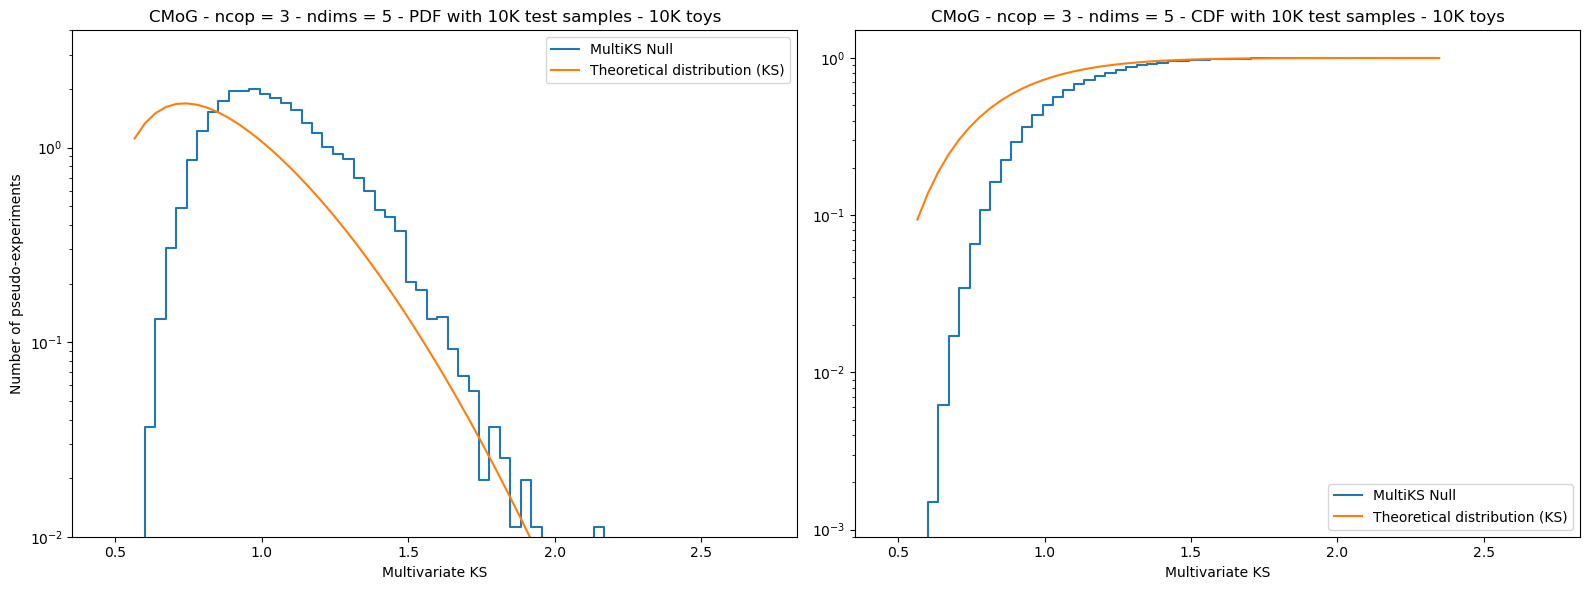

Time elapsed: 0.8825878333300352 seconds.


In [ ]:
start = timer()

nsamples = MultiKSTest.Inputs.batch_size_test
niter = MultiKSTest.Inputs.niter
ns = nsamples**2 /(2*nsamples)

scale = 'log'
num_bins = 50  # number of bins|
dist_null = np.array(MultiKSTest.Results[-1].result_value["metric_list"])*np.sqrt(ns)
# Compute the mean and standard deviation of the sample and their standard errors
mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
print("mu =", mu, "+/-", deltamu)
print("sigma =", sigma, "+/-", deltasigma)
# Minimum and maximum x values
min_x = min(dist_null) # lower limit of the binning
max_x = max(dist_null) # upper limit of the binning
# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)
# Create histogram for values and normalize counts to sum to 1
counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
cum_counts = np.cumsum(counts)/np.sum(counts)
# Get the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
# Calculate the theoretical PDF and CDF of the KS distribution for each x value
theoretical_pdf_ks = kstwobign.pdf(x)
theoretical_cdf_ks = kstwobign.cdf(x)

# Empirical SKS Normal
empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
# Draw the first plot
ax[0].plot(bin_centers, counts, linestyle = '-', label='MultiKS Null', drawstyle='steps-mid')
ax[0].plot(x, theoretical_pdf_ks, label='Theoretical distribution (KS)')
#ax[0].plot(x, empirical_pdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[0].set_yscale(scale)
ax[0].set_xlim(0.005*np.sqrt(ns), 0.04*np.sqrt(ns))
ax[0].set_ylim(0.01, 4)
ax[0].set_xlabel('Multivariate KS')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - PDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[0].legend(loc='upper right')
# Draw the second plot
ax[1].plot(bin_centers, cum_counts, linestyle = '-', label='MultiKS Null', drawstyle='steps-mid')
ax[1].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
#ax[1].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[1].set_yscale(scale)
ax[1].set_xlim(0.005*np.sqrt(ns), 0.04*np.sqrt(ns))
ax[1].set_ylim(9e-4, 1.5)
ax[1].set_xlabel('Multivariate KS')
ax[1].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[1].legend(loc='lower right')
## Draw the third plot
#ax[2].plot(bin_centers, cum_counts, linestyle = '-', label='FN Null', drawstyle='steps-mid')
##ax[2].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
##ax[2].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
#ax[2].set_yscale(scale)
#ax[2].set_xlim(0.25, 2)
#ax[2].set_ylim(0.8, 1)
#ax[2].set_xlabel('KS vs SKS')
#ax[2].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
#ax[2].legend(loc='lower right')
# Adjust the width space
plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
# Display the figure with the two subplots
plt.tight_layout()
#plt.savefig(results_path+'SKS_nsamples_'+str(nsamples)+'_ndims_'+'_'+str(ndims)+'_niter_'+str(niter)+'.pdf')
plt.show()
plt.close()
end = timer()
print("Time elapsed:", end-start, "seconds.")

In [ ]:
cl_list = [0.68, 0.95, 0.99]
multi_ks_thresholds = [[cl, [int(cl*len(dist_null)), int((1-cl)*len(dist_null))], np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
multi_ks_thresholds

[[0.68, [6800, 3199], 1.1313710353446096],
 [0.95, [9500, 500], 1.4566393387274343],
 [0.99, [9900, 100], 1.668772856652466]]

## SKS Test

In [ ]:
#tf.config.run_functions_eagerly(True)#
SKSTest.Test_tf(max_vectorize=20)
SKSTest.Results[-1].result_value


------------------------------------------
Starting SKS metric calculation...
Running TF SKS calculation...
niter = 1000
batch_size = 100000
The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.
nchunks = 50
Iterating from 0 to 20 out of 1000 .


Iterating from 20 to 40 out of 1000 .
Iterating from 40 to 60 out of 1000 .
Iterating from 60 to 80 out of 1000 .
Iterating from 80 to 100 out of 1000 .
Iterating from 100 to 120 out of 1000 .
Iterating from 120 to 140 out of 1000 .
Iterating from 140 to 160 out of 1000 .
Iterating from 160 to 180 out of 1000 .
Iterating from 180 to 200 out of 1000 .
Iterating from 200 to 220 out of 1000 .
Iterating from 220 to 240 out of 1000 .
Iterating from 240 to 260 out of 1000 .
Iterating from 260 to 280 out of 1000 .
Iterating from 280 to 300 out of 1000 .
Iterating from 300 to 320 out of 1000 .
Iterating from 320 to 340 out of 1000 .
Iterating from 340 to 360 out of 1000 .
Iterating from 360 to 380 out of 1000 .
Iterating from 380 to 400 out of 1000 .
Iterating from 400 to 420 out of 1000 .
Iterating from 420 to 440 out of 1000 .
Iterating from 440 to 460 out of 1000 .
Iterating from 460 to 480 out of 1000 .
Iterating from 480 to 500 out of 1000 .
Iterating from 500 to 520 out of 1000 .
Iterati

{'metric_lists': array([[0.00334001, 0.00727999, 0.00703001, ..., 0.00726998, 0.00606   ,
         0.00513999],
        [0.00496   , 0.00347   , 0.00376999, ..., 0.00370002, 0.00411999,
         0.00480002],
        [0.00622001, 0.00399999, 0.00288001, ..., 0.00292003, 0.00448999,
         0.00545   ],
        ...,
        [0.00316   , 0.00231004, 0.00422001, ..., 0.00281   , 0.00455999,
         0.00225002],
        [0.00445998, 0.00319   , 0.00445002, ..., 0.00237   , 0.00474   ,
         0.00668001],
        [0.00492001, 0.00687   , 0.00779   , ..., 0.00782999, 0.00616002,
         0.00770998]]),
 'metric_means': array([0.00473171, 0.0039742 , 0.0038303 , 0.00413331, 0.003546  ,
        0.0039954 , 0.00304251, 0.0031634 , 0.0035589 , 0.00311461,
        0.003815  , 0.00384981, 0.0039013 , 0.00411971, 0.00417971,
        0.00396141, 0.00436711, 0.00368471, 0.00308801, 0.0037564 ,
        0.0032012 , 0.00390741, 0.0035652 , 0.00458861, 0.00333391,
        0.0039789 , 0.0037007 , 0.003

In [ ]:
SKSTest.Results.save_to_json(null_hypotheses_dir+"Null_5D_SKS.json")

In [ ]:
SKSTest.Results.load_from_json(null_hypotheses_dir+"Null_5D_SKS.json")

mu = 0.8681888690820382 +/- 0.0005151151035698314
sigma = 0.12762981565583328 +/- 0.0036936012404512695


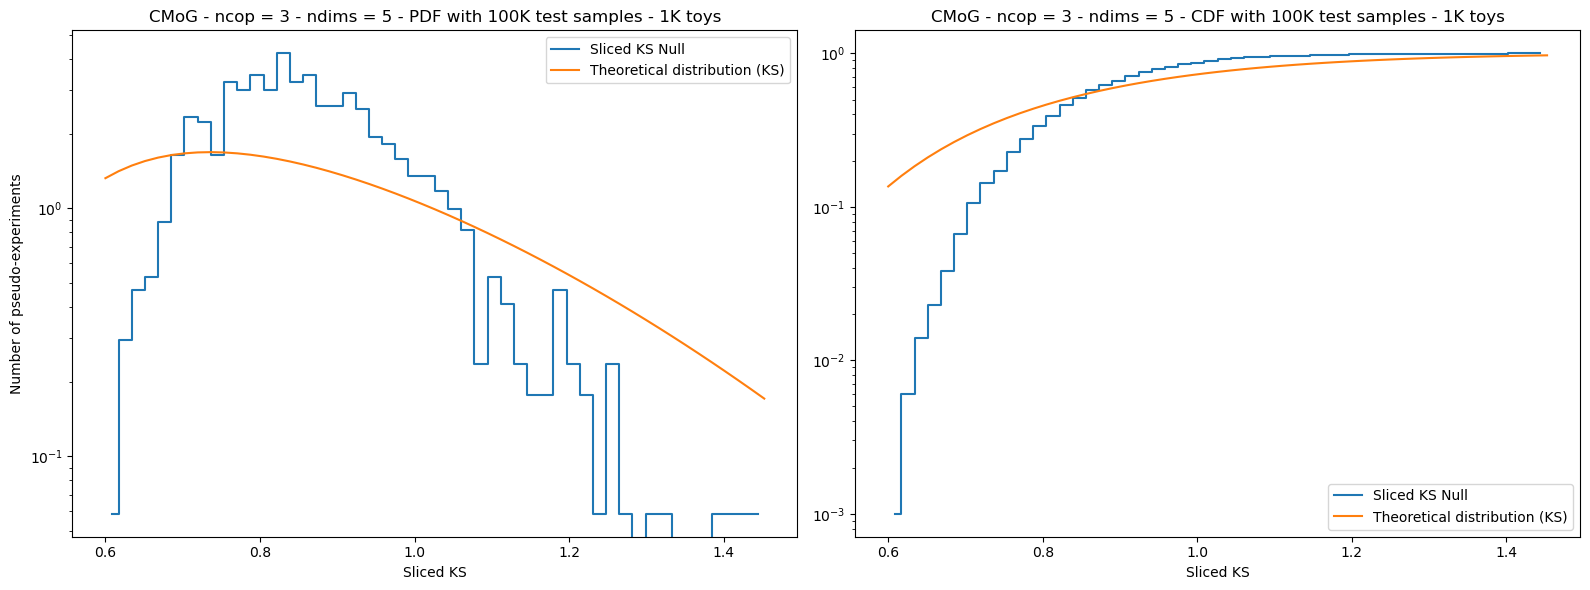

Time elapsed: 1.6945239193737507 seconds.


In [ ]:
start = timer()

nsamples = SKSTest.Inputs.batch_size_test
niter = SKSTest.Inputs.niter
ns = nsamples**2 /(2*nsamples)

scale = 'log'
num_bins = 50  # number of bins|
dist_null = np.array(SKSTest.Results[-1].result_value["metric_means"])*np.sqrt(ns)
# Compute the mean and standard deviation of the sample and their standard errors
mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
print("mu =", mu, "+/-", deltamu)
print("sigma =", sigma, "+/-", deltasigma)
# Minimum and maximum x values
min_x = min(dist_null) # lower limit of the binning
max_x = max(dist_null) # upper limit of the binning
# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)
# Create histogram for values and normalize counts to sum to 1
counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
cum_counts = np.cumsum(counts)/np.sum(counts)
# Get the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
# Calculate the theoretical PDF and CDF of the KS distribution for each x value
theoretical_pdf_ks = kstwobign.pdf(x)
theoretical_cdf_ks = kstwobign.cdf(x)

# Empirical SKS Normal
empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
# Draw the first plot
ax[0].plot(bin_centers, counts, linestyle = '-', label='Sliced KS Null', drawstyle='steps-mid')
ax[0].plot(x, theoretical_pdf_ks, label='Theoretical distribution (KS)')
#ax[0].plot(x, empirical_pdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[0].set_yscale(scale)
#ax[0].set_xlim(0.005*np.sqrt(ns), 0.025*np.sqrt(ns))
#ax[0].set_ylim(0.01, 4)
ax[0].set_xlabel('Sliced KS')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - PDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[0].legend(loc='upper right')
# Draw the second plot
ax[1].plot(bin_centers, cum_counts, linestyle = '-', label='Sliced KS Null', drawstyle='steps-mid')
ax[1].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
#ax[1].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[1].set_yscale(scale)
#ax[1].set_xlim(0.005*np.sqrt(ns), 0.025*np.sqrt(ns))
#ax[1].set_ylim(9e-4, 1.5)
ax[1].set_xlabel('Sliced KS')
ax[1].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[1].legend(loc='lower right')
## Draw the third plot
#ax[2].plot(bin_centers, cum_counts, linestyle = '-', label='FN Null', drawstyle='steps-mid')
##ax[2].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
##ax[2].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
#ax[2].set_yscale(scale)
#ax[2].set_xlim(0.25, 2)
#ax[2].set_ylim(0.8, 1)
#ax[2].set_xlabel('KS vs SKS')
#ax[2].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
#ax[2].legend(loc='lower right')
# Adjust the width space
plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
# Display the figure with the two subplots
plt.tight_layout()
#plt.savefig(results_path+'SKS_nsamples_'+str(nsamples)+'_ndims_'+'_'+str(ndims)+'_niter_'+str(niter)+'.pdf')
plt.show()
plt.close()
end = timer()
print("Time elapsed:", end-start, "seconds.")

In [ ]:
cl_list = [0.68, 0.95, 0.99]
sks_thresholds = [[cl, [int(cl*len(dist_null)), int((1-cl)*len(dist_null))], np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
sks_thresholds

[[0.68, [680, 319], 0.9135245968551345],
 [0.95, [950, 50], 1.0992073254638377],
 [0.99, [990, 10], 1.2521102453513773]]

## SWD Test

In [ ]:
SWDMetric.Test_tf(max_vectorize=100)
SWDMetric.Results[-1].result_value


------------------------------------------
Starting SWD metric calculation...
Running TF SWD calculation...
niter = 1000
batch_size = 100000


The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.
nchunks = 10
Iterating from 0 to 100 out of 1000 .
Iterating from 100 to 200 out of 1000 .
Iterating from 200 to 300 out of 1000 .
Iterating from 300 to 400 out of 1000 .
Iterating from 400 to 500 out of 1000 .
Iterating from 500 to 600 out of 1000 .
Iterating from 600 to 700 out of 1000 .
Iterating from 700 to 800 out of 1000 .
Iterating from 800 to 900 out of 1000 .
Iterating from 900 to 1000 out of 1000 .
SWD metric calculation completed in 142.20928873308003 seconds.


{'metric_lists': array([[0.0055455 , 0.00605544, 0.00309382, ..., 0.0053953 , 0.00517445,
         0.00679499],
        [0.00455791, 0.00547601, 0.00539397, ..., 0.00634283, 0.00705638,
         0.00538655],
        [0.00665129, 0.00598698, 0.00584313, ..., 0.00455608, 0.00694719,
         0.00557499],
        ...,
        [0.00689652, 0.00299982, 0.00347891, ..., 0.00325553, 0.01058677,
         0.00429074],
        [0.00649698, 0.00778986, 0.0052194 , ..., 0.00460151, 0.00416956,
         0.00563185],
        [0.00457079, 0.00371021, 0.00537506, ..., 0.00394693, 0.00847137,
         0.00577173]]),
 'metric_means': array([0.005127  , 0.00508106, 0.00558793, 0.00510129, 0.00657872,
        0.00566876, 0.00747275, 0.00774897, 0.00673618, 0.00478796,
        0.00521594, 0.00692487, 0.0062293 , 0.00752008, 0.00454823,
        0.00508239, 0.00487357, 0.00489169, 0.00523776, 0.00470628,
        0.0091546 , 0.01010595, 0.00438218, 0.00495659, 0.0076542 ,
        0.00631929, 0.00619085, 0.007

In [ ]:
SWDMetric.Results.save_to_json(null_hypotheses_dir+"Null_5D_SWD.json")

In [ ]:
SWDMetric.Results.load_from_json(null_hypotheses_dir+"Null_5D_SWD.json")

mu = 0.6366484031578014 +/- 0.00097691675930955
sigma = 0.17576353557574675 +/- 0.005071942980043717


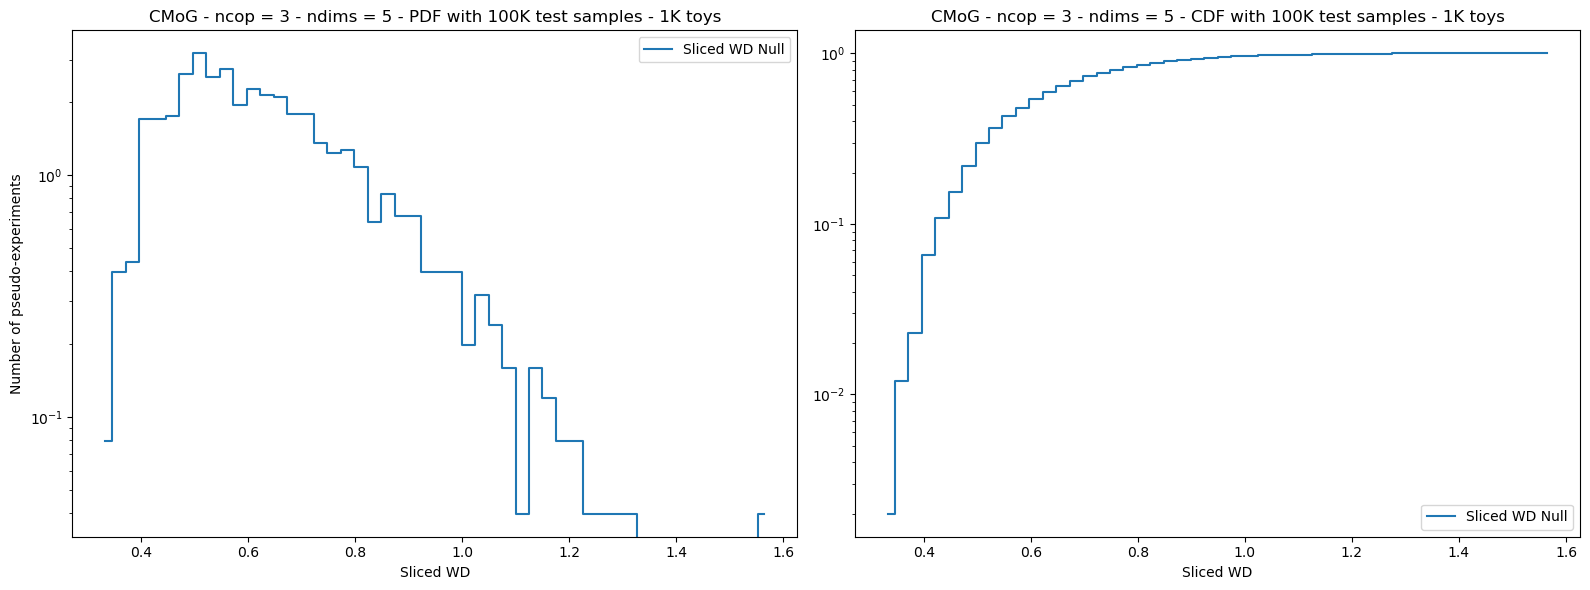

Time elapsed: 0.736969081684947 seconds.


In [ ]:
start = timer()

nsamples = SWDMetric.Inputs.batch_size_test
niter = SWDMetric.Inputs.niter
ns = nsamples**2 /(2*nsamples)

scale = 'log'
num_bins = 50  # number of bins|
dist_null = np.array(SWDMetric.Results[-1].result_value["metric_means"])*np.sqrt(ns/ndims)
# Compute the mean and standard deviation of the sample and their standard errors
mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
print("mu =", mu, "+/-", deltamu)
print("sigma =", sigma, "+/-", deltasigma)
# Minimum and maximum x values
min_x = min(dist_null) # lower limit of the binning
max_x = max(dist_null) # upper limit of the binning
# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)
# Create histogram for values and normalize counts to sum to 1
counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
cum_counts = np.cumsum(counts)/np.sum(counts)
# Get the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
# Calculate the theoretical PDF and CDF of the KS distribution for each x value
#theoretical_pdf_ks = kstwobign.pdf(x)
#theoretical_cdf_ks = kstwobign.cdf(x)

# Empirical SKS Normal
#empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=0.155)
#empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=0.155)
# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
# Draw the first plot
ax[0].plot(bin_centers, counts, linestyle = '-', label='Sliced WD Null', drawstyle='steps-mid')
#ax[0].plot(x, theoretical_pdf_ks, label='Theoretical distribution (KS)')
#ax[0].plot(x, empirical_pdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[0].set_yscale(scale)
#ax[0].set_xlim(0.008*np.sqrt(ns), 0.055*np.sqrt(ns))
#ax[0].set_ylim(0.01, 1.8)
ax[0].set_xlabel('Sliced WD')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - PDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[0].legend(loc='upper right')
# Draw the second plot
ax[1].plot(bin_centers, cum_counts, linestyle = '-', label='Sliced WD Null', drawstyle='steps-mid')
#ax[1].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
#ax[1].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[1].set_yscale(scale)
#ax[0].set_xlim(0.008*np.sqrt(ns), 0.055*np.sqrt(ns))
#ax[1].set_ylim(9e-4, 1.5)
ax[1].set_xlabel('Sliced WD')
ax[1].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[1].legend(loc='lower right')
## Draw the third plot
#ax[2].plot(bin_centers, cum_counts, linestyle = '-', label='FN Null', drawstyle='steps-mid')
##ax[2].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
##ax[2].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
#ax[2].set_yscale(scale)
#ax[2].set_xlim(0.25, 2)
#ax[2].set_ylim(0.8, 1)
#ax[2].set_xlabel('KS vs SKS')
#ax[2].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
#ax[2].legend(loc='lower right')
# Adjust the width space
plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
# Display the figure with the two subplots
plt.tight_layout()
#plt.savefig(results_path+'SKS_nsamples_'+str(nsamples)+'_ndims_'+'_'+str(ndims)+'_niter_'+str(niter)+'.pdf')
plt.show()
plt.close()
end = timer()
print("Time elapsed:", end-start, "seconds.")

In [ ]:
cl_list = [0.68, 0.95, 0.99]
swd_thresholds = [[cl, [int(cl*len(dist_null)), int((1-cl)*len(dist_null))], np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
swd_thresholds

[[0.68, [680, 319], 0.6924871898855456],
 [0.95, [950, 50], 0.9747483375186353],
 [0.99, [990, 10], 1.1664085018754888]]

## FPD Test (Numpy vs TensorFlow)

In [ ]:
FPDMetric.Test_tf(max_vectorize=200)
#FPDMetric.Test_tf(max_vectorize=100)
FPDMetric.Results[-1].result_value


------------------------------------------
Starting FPD metric calculation...
Running TF FPD calculation...
niter = 1000
batch_size = 100000


The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.
nchunks = 5
Iterating from 0 to 200 out of 1000 .
Iterating from 200 to 400 out of 1000 .
Iterating from 400 to 600 out of 1000 .
Iterating from 600 to 800 out of 1000 .
Iterating from 800 to 1000 out of 1000 .
FPD metric calculation completed in 207.8688984196633 seconds.


{'metric_list': array([4.16114197e-05, 3.97100352e-05, 3.96167482e-05, 3.91025092e-05,
        3.91080293e-05, 3.84682742e-05, 3.92932844e-05, 4.04090408e-05,
        4.26686387e-05, 3.88400406e-05, 3.88553148e-05, 4.19579744e-05,
        3.97302344e-05, 4.24568860e-05, 4.08941628e-05, 3.89992390e-05,
        4.04653806e-05, 3.90857940e-05, 3.98291695e-05, 3.99937668e-05,
        4.44687968e-05, 3.95102164e-05, 3.90449720e-05, 3.97221690e-05,
        4.11384118e-05, 4.14212853e-05, 3.83616475e-05, 4.06964740e-05,
        4.02757788e-05, 4.05774893e-05, 3.96609398e-05, 4.09421006e-05,
        3.92410634e-05, 4.14058328e-05, 4.30670298e-05, 4.15174368e-05,
        4.10345320e-05, 3.92183197e-05, 4.05528563e-05, 3.92534894e-05,
        3.83630764e-05, 4.00853376e-05, 3.91451529e-05, 4.27930908e-05,
        3.84292136e-05, 4.01870730e-05, 4.06478769e-05, 4.00524298e-05,
        3.91578530e-05, 5.73760931e-05, 3.84281299e-05, 4.12262464e-05,
        3.83413858e-05, 4.07293795e-05, 3.8188346

In [ ]:
FPDMetric.Results.save_to_json(null_hypotheses_dir+"Null_5D_FPD.json")

In [ ]:
FPDMetric.Results.load_from_json(null_hypotheses_dir+"Null_5D_FPD.json")

In [ ]:
start = timer()

nsamples = FPDMetric.Inputs.batch_size_test
niter = FPDMetric.Inputs.niter
ns = nsamples**2 /(2*nsamples)

scale = 'log'
num_bins = 50  # number of bins|
dist_null_np = np.array(FPDMetric.Results[0].result_value["metric_list"])*(ns/ndims)**(3/2)
dist_null_tf = np.array(FPDMetric.Results[1].result_value["metric_list"])*(ns/ndims)**(3/2)
# Compute the mean and standard deviation of the sample and their standard errors
mu_np, deltamu_np, sigma_np, deltasigma_np = (np.mean(dist_null_np), se_mean(dist_null_np), np.std(dist_null_np), se_std(dist_null_np))
mu_tf, deltamu_tf, sigma_tf, deltasigma_tf = (np.mean(dist_null_tf), se_mean(dist_null_tf), np.std(dist_null_tf), se_std(dist_null_tf))
print("mu =", mu_tf, "+/-", deltamu_tf)
print("sigma =", sigma_tf, "+/-", deltasigma_tf)
# Minimum and maximum x values
min_x = min(dist_null_tf) # lower limit of the binning
max_x = max(dist_null_tf) # upper limit of the binning
# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)
# Create histogram for values and normalize counts to sum to 1
counts_np, bin_edges_np = np.histogram(dist_null_np, bins=x, density=True)
cum_counts_np = np.cumsum(counts_np)/np.sum(counts_np)
counts_tf, bin_edges_tf = np.histogram(dist_null_tf, bins=x, density=True)
cum_counts_tf = np.cumsum(counts_tf)/np.sum(counts_tf)
# Get the bin centers
bin_centers_np = (bin_edges_np[:-1] + bin_edges_np[1:]) / 2
bin_centers_tf = (bin_edges_tf[:-1] + bin_edges_tf[1:]) / 2
# Calculate the theoretical PDF and CDF of the KS distribution for each x value
#theoretical_pdf_ks = kstwobign.pdf(x)
#theoretical_cdf_ks = kstwobign.cdf(x)

# Empirical SKS Normal
#empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
#empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
# Draw the first plot
ax[0].plot(bin_centers_np, counts_np, linestyle = '-', label='FPD Null (NP)', drawstyle='steps-mid')
ax[0].plot(bin_centers_tf, counts_tf, linestyle = '-', label='FPD Null (TF)', drawstyle='steps-mid')
#ax[0].plot(x, theoretical_pdf_ks, label='Theoretical distribution (KS)')
#ax[0].plot(x, empirical_pdf_norm, label='FPD - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[0].set_yscale(scale)
#ax[0].set_xlim(0.005*np.sqrt(ns), 0.025*np.sqrt(ns))
#ax[0].set_ylim(0.01, 5)
ax[0].set_xlabel('FPD')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - PDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[0].legend(loc='upper right')
# Draw the second plot
ax[1].plot(bin_centers_np, cum_counts_np, linestyle = '-', label='FPD Null (NP)', drawstyle='steps-mid')
ax[1].plot(bin_centers_tf, cum_counts_tf, linestyle = '-', label='FPD Null (TF)', drawstyle='steps-mid')
#ax[1].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
#ax[1].plot(x, empirical_cdf_norm, label='FPD - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[1].set_yscale(scale)
#ax[1].set_xlim(0.005*np.sqrt(ns), 0.025*np.sqrt(ns))
#ax[1].set_ylim(9e-4, 1.5)
ax[1].set_xlabel('FPD')
ax[1].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[1].legend(loc='lower right')
## Draw the third plot
#ax[2].plot(bin_centers, cum_counts, linestyle = '-', label='FN Null', drawstyle='steps-mid')
##ax[2].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
##ax[2].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
#ax[2].set_yscale(scale)
#ax[2].set_xlim(0.25, 2)
#ax[2].set_ylim(0.8, 1)
#ax[2].set_xlabel('KS vs SKS')
#ax[2].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
#ax[2].legend(loc='lower right')
# Adjust the width space
plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
# Display the figure with the two subplots
plt.tight_layout()
#plt.savefig(results_path+'SKS_nsamples_'+str(nsamples)+'_ndims_'+'_'+str(ndims)+'_niter_'+str(niter)+'.pdf')
plt.show()
plt.close()
end = timer()
print("Time elapsed:", end-start, "seconds.")

IndexError: list index out of range

mu = 40.55284602419237 +/- 0.18578160292934456
sigma = 2.4238255147880152 +/- 0.16266171673491048


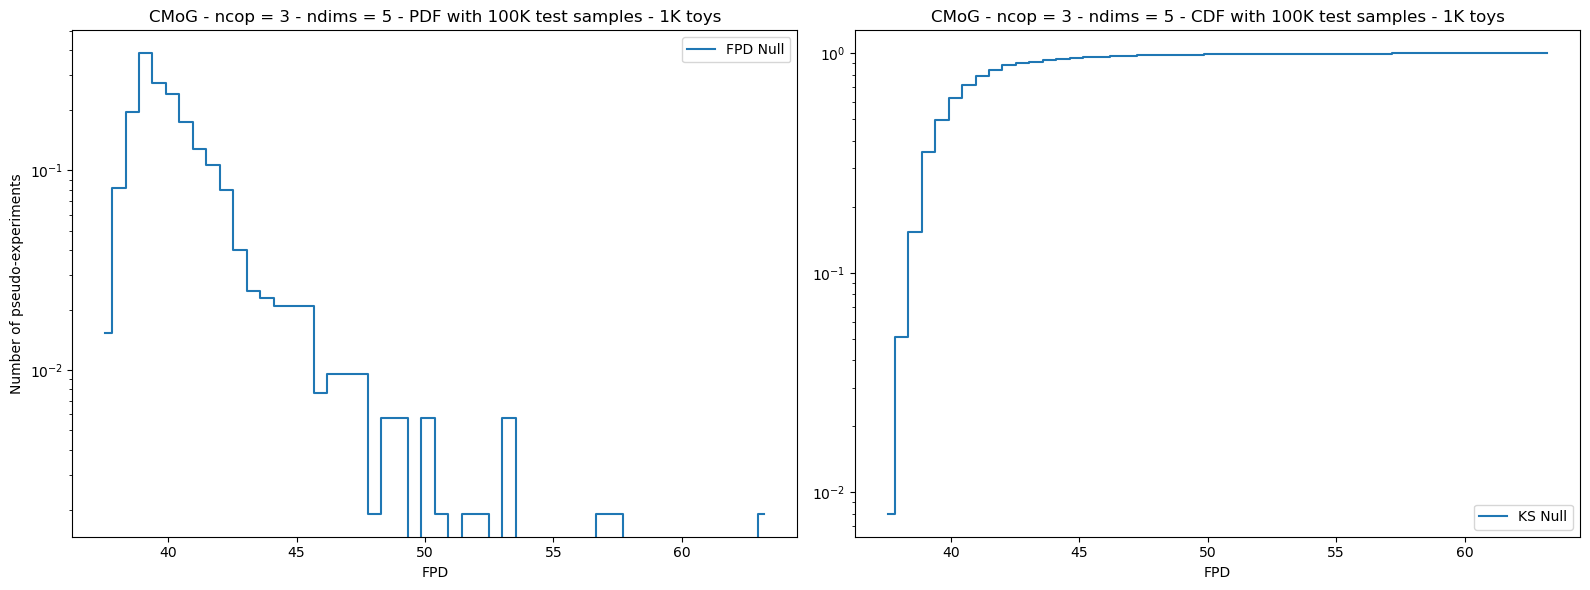

Time elapsed: 0.7945175394415855 seconds.


In [ ]:
start = timer()

nsamples = FPDMetric.Inputs.batch_size_test
niter = FPDMetric.Inputs.niter
ns = nsamples**2 /(2*nsamples)

scale = 'log'
num_bins = 50  # number of bins|
dist_null = np.array(FPDMetric.Results[-1].result_value["metric_list"])*(ns/ndims)**(3/2)
# Compute the mean and standard deviation of the sample and their standard errors
mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
print("mu =", mu, "+/-", deltamu)
print("sigma =", sigma, "+/-", deltasigma)
# Minimum and maximum x values
min_x = min(dist_null) # lower limit of the binning
max_x = max(dist_null) # upper limit of the binning
# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)
# Create histogram for values and normalize counts to sum to 1
counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
cum_counts = np.cumsum(counts)/np.sum(counts)
# Get the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
# Calculate the theoretical PDF and CDF of the KS distribution for each x value
#theoretical_pdf_ks = kstwobign.pdf(x)
#theoretical_cdf_ks = kstwobign.cdf(x)

# Empirical SKS Normal
#empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
#empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
# Draw the first plot
ax[0].plot(bin_centers, counts, linestyle = '-', label='FPD Null', drawstyle='steps-mid')
#ax[0].plot(x, theoretical_pdf_ks, label='Theoretical distribution (KS)')
#ax[0].plot(x, empirical_pdf_norm, label='FPD - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[0].set_yscale(scale)
#ax[0].set_xlim(0.005*np.sqrt(ns), 0.025*np.sqrt(ns))
#ax[0].set_ylim(0.01, 5)
ax[0].set_xlabel('FPD')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - PDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[0].legend(loc='upper right')
# Draw the second plot
ax[1].plot(bin_centers, cum_counts, linestyle = '-', label='KS Null', drawstyle='steps-mid')
#ax[1].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
#ax[1].plot(x, empirical_cdf_norm, label='FPD - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[1].set_yscale(scale)
#ax[1].set_xlim(0.005*np.sqrt(ns), 0.025*np.sqrt(ns))
#ax[1].set_ylim(9e-4, 1.5)
ax[1].set_xlabel('FPD')
ax[1].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[1].legend(loc='lower right')
## Draw the third plot
#ax[2].plot(bin_centers, cum_counts, linestyle = '-', label='FN Null', drawstyle='steps-mid')
##ax[2].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
##ax[2].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
#ax[2].set_yscale(scale)
#ax[2].set_xlim(0.25, 2)
#ax[2].set_ylim(0.8, 1)
#ax[2].set_xlabel('KS vs SKS')
#ax[2].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
#ax[2].legend(loc='lower right')
# Adjust the width space
plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
# Display the figure with the two subplots
plt.tight_layout()
#plt.savefig(results_path+'SKS_nsamples_'+str(nsamples)+'_ndims_'+'_'+str(ndims)+'_niter_'+str(niter)+'.pdf')
plt.show()
plt.close()
end = timer()
print("Time elapsed:", end-start, "seconds.")

In [ ]:
cl_list = [0.68, 0.95, 0.99]
fpd_thresholds = [[cl, [int(cl*len(dist_null)), int((1-cl)*len(dist_null))], np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
fpd_thresholds

[[0.68, [680, 319], 40.70734083144865],
 [0.95, [950, 50], 45.09527678297439],
 [0.99, [990, 10], 50.271573973192034]]

## KPD Test

In [ ]:
KPDMetric.Test_tf(max_vectorize=1)
KPDMetric.Results[-1].result_value


------------------------------------------
Starting KPD metric calculation...
Running TF KPD calculation...
niter = 1000
batch_size = 100000


The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.
nchunks = 1000
Iterating from 0 to 1 out of 1000 .
Iterating from 1 to 2 out of 1000 .
Iterating from 2 to 3 out of 1000 .
ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/tensorflow/python/util/deprecation.py", line 648, in new_func
    return func(*args, **kwargs)  File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2574, in while_loop_v2
    return while_loop(  File "/local_data/scratch/rtorre/anaconda3/envs/tf2_12/lib/python3.10/site-packages/tensorflow/pytho

{'metric_list': array([-4.33674619e-05, -5.28965850e-05,  1.10060334e-05, -2.11591674e-05,
        -4.66047094e-05,  1.73156503e-05, -4.07773360e-05, -3.72351071e-05,
        -1.31256672e-05, -6.00872340e-05, -4.07500217e-05,  1.78018654e-05,
         1.82535438e-06, -3.94341348e-05, -9.45791354e-06, -3.75479625e-05,
        -3.39838497e-05, -2.42414570e-05,  5.40688829e-05, -1.99735527e-05,
        -4.34610502e-05, -4.90732267e-05,  1.77701541e-06, -2.32692026e-05,
        -6.11932815e-05, -2.62856705e-06, -4.52569234e-05, -5.51489730e-06,
        -4.74517523e-05,  1.07501009e-05,  1.47093621e-05, -4.70440254e-05,
        -3.25043544e-05, -6.53499361e-05, -5.52225398e-05,  3.93452905e-05,
        -2.92150301e-05, -7.67794255e-06, -2.27488777e-05, -1.30847766e-05,
         1.13095326e-05, -5.19980895e-05, -4.08258191e-05, -7.41994639e-05,
        -3.52448456e-05, -2.99110805e-05, -5.69377245e-05, -1.27574239e-05,
        -6.04462749e-05, -4.01318094e-05, -1.93763130e-05, -1.64299866e-0

In [ ]:
KPDMetric.Results.save_to_json(null_hypotheses_dir+"Null_5D_KPD.json")

In [ ]:
KPDMetric.Results.load_from_json(null_hypotheses_dir+"Null_5D_KPD.json")

mu = -0.5291839763912877 +/- 0.010470581759295224
sigma = 0.5754206008337364 +/- 0.016754388500430747


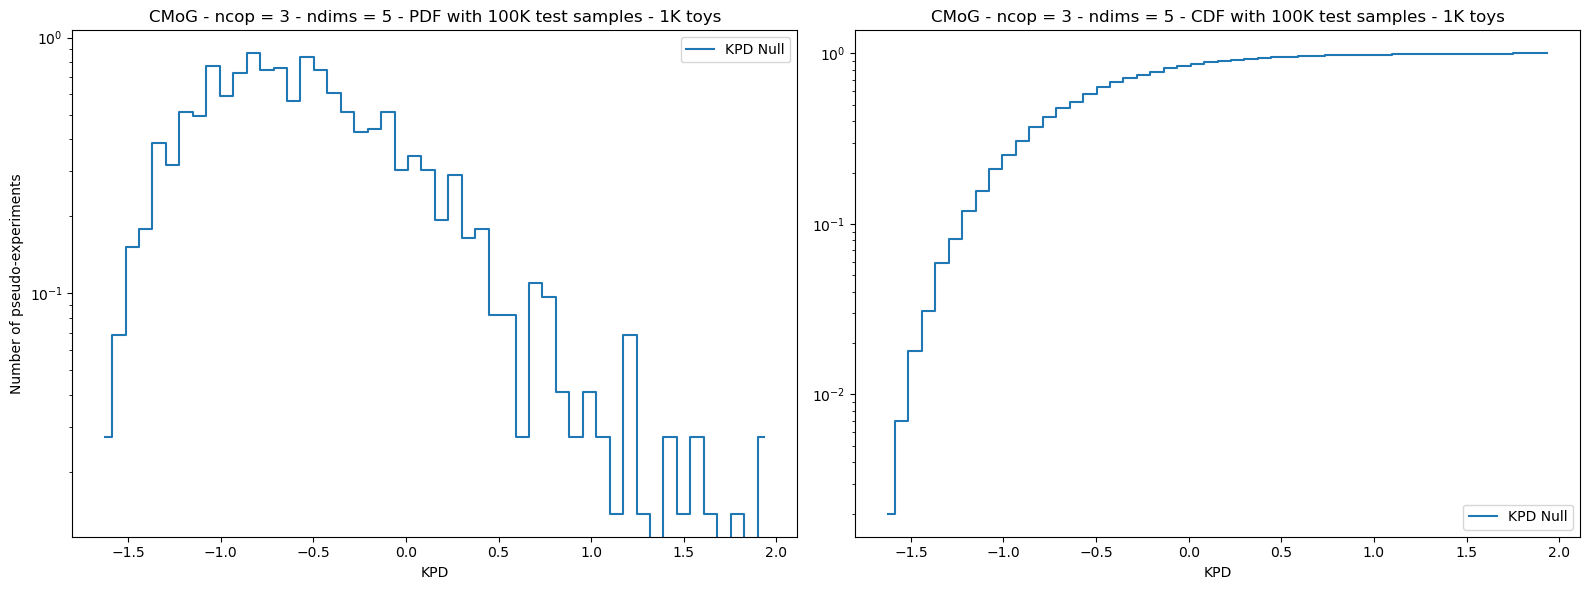

Time elapsed: 0.7911607902497053 seconds.


In [ ]:
start = timer()

nsamples = KPDMetric.Inputs.batch_size_test
niter = KPDMetric.Inputs.niter
ns = nsamples**2 /(2*nsamples)

scale = 'log'
num_bins = 50  # number of bins|
dist_null = np.array(KPDMetric.Results[-1].result_value["metric_list"])*ns/np.sqrt(ndims)
# Compute the mean and standard deviation of the sample and their standard errors
mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
print("mu =", mu, "+/-", deltamu)
print("sigma =", sigma, "+/-", deltasigma)
# Minimum and maximum x values
min_x = min(dist_null) # lower limit of the binning
max_x = max(dist_null) # upper limit of the binning
# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)
# Create histogram for values and normalize counts to sum to 1
counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
cum_counts = np.cumsum(counts)/np.sum(counts)
# Get the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
# Calculate the theoretical PDF and CDF of the KS distribution for each x value
#theoretical_pdf_ks = kstwobign.pdf(x)
#theoretical_cdf_ks = kstwobign.cdf(x)

# Empirical SKS Normal
#empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
#empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
# Draw the first plot
ax[0].plot(bin_centers, counts, linestyle = '-', label='KPD Null', drawstyle='steps-mid')
#ax[0].plot(x, theoretical_pdf_ks, label='Theoretical distribution (KS)')
#ax[0].plot(x, empirical_pdf_norm, label='KPD - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[0].set_yscale(scale)
#ax[0].set_xlim(0.005*np.sqrt(ns), 0.025*np.sqrt(ns))
#ax[0].set_ylim(0.01, 5)
ax[0].set_xlabel('KPD')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - PDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[0].legend(loc='upper right')
# Draw the second plot
ax[1].plot(bin_centers, cum_counts, linestyle = '-', label='KPD Null', drawstyle='steps-mid')
#ax[1].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
#ax[1].plot(x, empirical_cdf_norm, label='KPD - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[1].set_yscale(scale)
#ax[1].set_xlim(0.005*np.sqrt(ns), 0.025*np.sqrt(ns))
#ax[1].set_ylim(9e-4, 1.5)
ax[1].set_xlabel('KPD')
ax[1].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[1].legend(loc='lower right')
## Draw the third plot
#ax[2].plot(bin_centers, cum_counts, linestyle = '-', label='FN Null', drawstyle='steps-mid')
##ax[2].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
##ax[2].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
#ax[2].set_yscale(scale)
#ax[2].set_xlim(0.25, 2)
#ax[2].set_ylim(0.8, 1)
#ax[2].set_xlabel('KS vs SKS')
#ax[2].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
#ax[2].legend(loc='lower right')
# Adjust the width space
plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
# Display the figure with the two subplots
plt.tight_layout()
#plt.savefig(results_path+'SKS_nsamples_'+str(nsamples)+'_ndims_'+'_'+str(ndims)+'_niter_'+str(niter)+'.pdf')
plt.show()
plt.close()
end = timer()
print("Time elapsed:", end-start, "seconds.")

In [ ]:
cl_list = [0.68, 0.95, 0.99]
kpd_thresholds = [[cl, [int(cl*len(dist_null)), int((1-cl)*len(dist_null))], np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
kpd_thresholds

[[0.68, [680, 319], -0.3440743888157898],
 [0.95, [950, 50], 0.5113814932343488],
 [0.99, [990, 10], 1.3044753512548064]]

# Alternative hypotheses

## Thresholds

In [ ]:
fn_thresholds = fn_thresholds[1:]
fpd_thresholds = fpd_thresholds[1:]
kpd_thresholds = kpd_thresholds[1:]
ks_thresholds = ks_thresholds[1:]
#multi_ks_thresholds = multi_ks_thresholds[1:]
sks_thresholds = sks_thresholds[1:]
swd_thresholds = swd_thresholds[1:]

In [ ]:
print(f"fn_thresholds: {fn_thresholds}")
print(f"fpd_thresholds: {fpd_thresholds}")
print(f"kpd_thresholds: {kpd_thresholds}")
print(f"ks_thresholds: {ks_thresholds}")
#print(f"multi_ks_thresholds: {multi_ks_thresholds}")
print(f"sks_thresholds: {sks_thresholds}")
print(f"swd_thresholds: {swd_thresholds}")

fn_thresholds: [[0.95, [950, 50], 1.2365268905752], [0.99, [990, 10], 1.4684991255333162]]
fpd_thresholds: [[0.95, [950, 50], 45.09527678297439], [0.99, [990, 10], 50.271573973192034]]
kpd_thresholds: [[0.95, [950, 50], 0.5113814932343488], [0.99, [990, 10], 1.3044753512548064]]
ks_thresholds: [[0.95, [950, 50], 1.1381595409713376], [0.99, [990, 10], 1.3528197029565723]]
sks_thresholds: [[0.95, [950, 50], 1.0992073254638377], [0.99, [990, 10], 1.2521102453513773]]
swd_thresholds: [[0.95, [950, 50], 0.9747483375186353], [0.99, [990, 10], 1.1664085018754888]]


## Scan

In [ ]:
niter = 1_000
nsamples = 100_000
ns = nsamples**2 /(2*nsamples)

fn_list = []
fpd_list = []
kpd_list = []
ks_list = []
#multi_ks_list = []
sks_list = []
swd_list = []
exclusion_list = []

fn_threshold_number = 0
fpd_threshold_number = 0
kpd_threshold_number = 0
ks_threshold_number = 0
#multi_ks_threshold_number = 0
sks_threshold_number = 0
swd_threshold_number = 0

start = timer()  
for i in range(500):
    seed = 0
    ncomp = 3
    ndims = 5
    delta = 0.0001
    eps = 0+i*delta
    print("\n------------------")
    print(f"eps = {eps}")
    eps_loc = 10*eps
    eps_scale = eps
    dist_1 = MixtureDistributions.MixtureGaussian(ncomp, ndims, 0., 0., seed)
    dist_2 = MixtureDistributions.MixtureGaussian(ncomp, ndims, eps_loc, eps_scale, seed)

    TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                       dist_2_input = dist_2,
                                                       niter = 10,
                                                       batch_size_test = 100_000,
                                                       batch_size_gen = 1000,
                                                       small_sample_threshold = 1e7,
                                                       dtype_input = tf.float64,
                                                       seed_input = 0,
                                                       use_tf = True,
                                                       mirror_strategy = False,
                                                       verbose = False)

    FNMetric = GMetrics.FNMetric(TwoSampleTestInputs,
                             verbose = False)
    FPDMetric = GMetrics.FPDMetric(TwoSampleTestInputs,
                               progress_bar = False,
                               verbose = False)
    KPDMetric = GMetrics.KPDMetric(TwoSampleTestInputs,
                                 progress_bar = False,
                                 verbose = False)
    KSTest = GMetrics.KSTest(TwoSampleTestInputs,
                             verbose = False)
    #MultiKSTest = GMetrics.MultiKSTest(TwoSampleTestInputs,
    #                                   verbose = False)
    SKSTest = GMetrics.SKSTest(TwoSampleTestInputs,
                               nslices = 100,
                               seed_slicing = 0,
                               verbose = False)
    SWDMetric = GMetrics.SWDMetric(TwoSampleTestInputs,
                                   nslices = 100,
                                   seed_slicing = 0,
                                   verbose = False)

    if fn_threshold_number < len(fn_thresholds):
        FNMetric.Test_tf(max_vectorize = 1000)
        fn = np.mean(FNMetric.Results[-1].result_value["metric_list"])*np.sqrt(ns)/ndims
        fn_list.append(fn)
        print(f"fn statistic = {fn}\t-\t next threshold = {fn_thresholds[fn_threshold_number][2]} at {fn_thresholds[fn_threshold_number][0]} CL")
        fn_threshold = fn_thresholds[fn_threshold_number]
        if fn > fn_threshold[2]:
            end = timer()
            print(f"=======> fn excluded at {fn_threshold[0]} CL in {end-start} seconds")
            exclusion_list.append([eps, "fn statistic", fn, fn_threshold[0]])
            fn_threshold_number += 1
            
    if fpd_threshold_number < len(fpd_thresholds):
        FPDMetric.Test_tf(max_vectorize=400)
        fpd = np.mean(FPDMetric.Results[-1].result_value["metric_list"])*(ns/ndims)**(3/2)
        fpd_list.append(fpd)
        print(f"fpd statistic = {fpd}\t-\t next threshold = {fpd_thresholds[fpd_threshold_number][2]} at {fpd_thresholds[fpd_threshold_number][0]} CL")
        fpd_threshold = fpd_thresholds[fpd_threshold_number]
        if fpd > fpd_threshold[2]:
            end = timer()
            print(f"=======> fpd excluded at {fpd_threshold[0]} CL in {end-start} seconds")
            exclusion_list.append([eps, "fpd statistic", fpd, fpd_threshold[0]])
            fpd_threshold_number += 1
            
    if kpd_threshold_number < len(kpd_thresholds):
        KPDMetric.Test_tf(max_vectorize=2)
        kpd = np.mean(KPDMetric.Results[-1].result_value["metric_list"])*ns/np.sqrt(ndims)
        kpd_list.append(kpd)
        print(f"kpd statistic = {kpd}\t-\t next threshold = {kpd_thresholds[kpd_threshold_number][2]} at {kpd_thresholds[kpd_threshold_number][0]} CL")
        kpd_threshold = kpd_thresholds[kpd_threshold_number]
        if kpd > kpd_threshold[2]:
            end = timer()
            print(f"=======> kpd excluded at {kpd_threshold[0]} CL in {end-start} seconds")
            exclusion_list.append([eps, "kpd statistic", kpd, kpd_threshold[0]])
            kpd_threshold_number += 1

    if ks_threshold_number < len(ks_thresholds):
        KSTest.Test_tf(max_vectorize=1000)
        ks = np.mean(KSTest.Results[-1].result_value["statistic_means"])*np.sqrt(ns)
        ks_list.append(ks)
        print(f"ks statistic = {ks}\t-\t next threshold = {ks_thresholds[ks_threshold_number][2]} at {ks_thresholds[ks_threshold_number][0]} CL")
        ks_threshold = ks_thresholds[ks_threshold_number]
        if ks > ks_threshold[2]:
            end = timer()
            print(f"=======> ks excluded at {ks_threshold[0]} CL in {end-start} seconds")
            exclusion_list.append([eps, "ks statistic", ks, ks_threshold[0]])
            ks_threshold_number += 1
            
    #if multi_ks_threshold_number < len(multi_ks_thresholds):
    #    MultiKSTest.Test_tf()
    #    multi_ks = np.mean(MultiKSTest.Results[-1].result_value["metric_list"])*np.sqrt(ns)
    #    multi_ks_list.append(multi_ks)
    #    print(f"multi ks statistic = {multi_ks}\t-\t next threshold = {multi_ks_thresholds[multi_ks_threshold_number][2]} at {multi_ks_thresholds[multi_ks_threshold_number][0]} CL")
    #    multi_ks_threshold = multi_ks_thresholds[multi_ks_threshold_number]
    #    if multi_ks > multi_ks_threshold[2]:
    #        end = timer()
    #        print(f"=======> multi ks excluded at {multi_ks_threshold[0]} CL in {end-start} seconds")
    #        exclusion_list.append([eps, "multi ks statistic", multi_ks, multi_ks_threshold[0]])
    #        multi_ks_threshold_number += 1
            
    if sks_threshold_number < len(sks_thresholds):
        SKSTest.Test_tf(max_vectorize=1000)
        sks = np.mean(SKSTest.Results[-1].result_value["metric_means"])*np.sqrt(ns)
        sks_list.append(sks)
        print(f"sks statistic = {sks}\t-\t next threshold = {sks_thresholds[sks_threshold_number][2]} at {sks_thresholds[sks_threshold_number][0]} CL")
        sks_threshold = sks_thresholds[sks_threshold_number]
        if sks > sks_threshold[2]:
            end = timer()
            print(f"=======> sks excluded at {sks_threshold[0]} CL in {end-start} seconds")
            exclusion_list.append([eps, "sks statistic", sks, sks_threshold[0]])
            sks_threshold_number += 1
            
    if swd_threshold_number < len(swd_thresholds):
        SWDMetric.Test_tf(max_vectorize=1000)
        swd = np.mean(SWDMetric.Results[-1].result_value["metric_means"])*np.sqrt(ns/ndims)
        swd_list.append(swd)
        print(f"swd statistic = {swd}\t-\t next threshold = {swd_thresholds[swd_threshold_number][2]} at {swd_thresholds[swd_threshold_number][0]} CL")
        swd_threshold = swd_thresholds[swd_threshold_number]
        if swd > swd_threshold[2]:
            end = timer()
            print(f"=======> swd excluded at {swd_threshold[0]} CL in {end-start} seconds")
            exclusion_list.append([eps, "swd statistic", swd, swd_threshold[0]])
            swd_threshold_number += 1
            
    #if fn_threshold_number >= len(fn_thresholds) and fpd_threshold_number >= len(fpd_thresholds) and kpd_threshold_number >= len(kpd_thresholds) and ks_threshold_number >= len(ks_thresholds) and multi_ks_threshold_number >= len(multi_ks_thresholds) and sks_threshold_number >= len(sks_thresholds) and swd_threshold_number >= len(swd_thresholds):
    if fn_threshold_number >= len(fn_thresholds) and fpd_threshold_number >= len(fpd_thresholds) and kpd_threshold_number >= len(kpd_thresholds) and ks_threshold_number >= len(ks_thresholds) and sks_threshold_number >= len(sks_thresholds) and swd_threshold_number >= len(swd_thresholds):
        break
                        
end = timer()
print("Time elapsed:", end-start, "seconds.")


------------------
eps = 0.0
Checking and setting numerical distributions.
Setting dist_num from dist_symb.
Setting dist_num from dist_symb.
fn statistic = 0.598196053283708	-	 next threshold = 1.2365268905752 at 0.95 CL
fpd statistic = 39.966326032964936	-	 next threshold = 45.09527678297439 at 0.95 CL
kpd statistic = -0.5515261106260152	-	 next threshold = 0.5113814932343488 at 0.95 CL
ks statistic = 0.8491697351567128	-	 next threshold = 1.1381595409713376 at 0.95 CL
sks statistic = 0.8557509388905462	-	 next threshold = 1.0992073254638377 at 0.95 CL
swd statistic = 0.5858245207476112	-	 next threshold = 0.9747483375186353 at 0.95 CL

------------------
eps = 0.0001
Checking and setting numerical distributions.
Setting dist_num from dist_symb.
Setting dist_num from dist_symb.
fn statistic = 0.583483946108059	-	 next threshold = 1.2365268905752 at 0.95 CL
fpd statistic = 39.975581328907694	-	 next threshold = 45.09527678297439 at 0.95 CL
kpd statistic = -0.5452509834419949	-	 next t

## Results

In [ ]:
print(f"fn_thresholds: {fn_thresholds}")
print(f"fpd_thresholds: {fpd_thresholds}")
print(f"kpd_thresholds: {kpd_thresholds}")
print(f"ks_thresholds: {ks_thresholds}")
print(f"multi_ks_thresholds: {multi_ks_thresholds}")
print(f"sks_thresholds: {sks_thresholds}")
print(f"swd_thresholds: {swd_thresholds}")

fn_thresholds: [[0.95, [9500, 500], 1.201933747163374], [0.99, [9900, 100], 1.5292055424498905]]
fpd_thresholds: [[0.95, [9500, 500], 4.329877652456557], [0.99, [9900, 100], 6.352959846557846]]
kpd_thresholds: [[0.95, [9500, 500], 0.30746255888564705], [0.99, [9900, 100], 0.5753294046664447]]
ks_thresholds: [[0.95, [9500, 500], 1.1313706138761246], [0.99, [9900, 100], 1.2855206049622938]]
multi_ks_thresholds: [[0.95, [9500, 500], 1.4566393387274343], [0.99, [9900, 100], 1.668772856652466]]
sks_thresholds: [[0.95, [9500, 500], 1.112986448315256], [0.99, [9900, 100], 1.2742067049480295]]
swd_thresholds: [[0.95, [9500, 500], 2.202632934055404], [0.99, [9900, 100], 2.709669622518888]]


In [ ]:
exclusion_list

[[0.001, 'ks statistic', 1.150887381160314, 0.95],
 [0.0012000000000000001, 'multi ks statistic', 1.530886280735438, 0.95],
 [0.0014, 'ks statistic', 1.3180470296371594, 0.99],
 [0.0014, 'multi ks statistic', 1.7239264333480646, 0.99],
 [0.0028, 'sks statistic', 1.1180563783334174, 0.95],
 [0.0038, 'sks statistic', 1.2864044770591279, 0.99],
 [0.0056, 'fn statistic', 1.211483576862899, 0.95],
 [0.0071, 'fpd statistic', 4.362107332247842, 0.95],
 [0.0079, 'fn statistic', 1.536376470735762, 0.99],
 [0.008400000000000001, 'kpd statistic', 0.3087719336084374, 0.95],
 [0.0097, 'fpd statistic', 6.420883800476466, 0.99],
 [0.0117, 'kpd statistic', 0.5851484911513134, 0.99],
 [0.0143, 'swd statistic', 2.2122717982708178, 0.95],
 [0.018000000000000002, 'swd statistic', 2.717441299061513, 0.99]]

In [ ]:
exclusion_list_dict = {"5D": exclusion_list}

In [ ]:
with open(null_hypotheses_dir+"exclusion_list.json", "w") as outfile:
    json.dump(exclusion_list_dict, outfile)

In [ ]:
#with open(null_hypotheses_dir+"exclusion_list.json", "r") as infile:
#    exclusion_list_dict = json.load(infile)

# Comparing with Likeliood Ratio

## LR Test (95% CL) - $\epsilon=0.000129$

In [ ]:
seed = 0
ncomp = 3
ndims = 5
eps = 0.000129
eps_loc = 10*eps
eps_scale = eps
dist_1 = MixtureDistributions.MixtureGaussian(ncomp, ndims, 0., 0., seed)
dist_2 = MixtureDistributions.MixtureGaussian(ncomp, ndims, eps_loc, eps_scale, seed)
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = 10_000,
                                                   batch_size_test = 10_000,
                                                   batch_size_gen = 100,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             null_test=True,
                             verbose = True)

Parsing input distribution...


Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.


In [ ]:
LRMetric.Test_tf()
LRMetric.Results[-1].result_value


------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 10000
LR metric calculation completed in 1648.533557456918 seconds.


{'logprob_ref_ref_sum_list': array([-26323.43892025, -26338.13871412, -26410.96420995, ...,
        -26414.61320193, -26051.01197648, -26070.38371944]),
 'logprob_ref_alt_sum_list': array([-26119.44929672, -26171.75648107, -26213.63406758, ...,
        -26145.33669568, -26199.68479434, -26171.97875077]),
 'logprob_alt_alt_sum_list': array([-26118.16856901, -26176.65122606, -26216.65046218, ...,
        -26145.60348555, -26203.71388187, -26174.22928749]),
 'lik_ratio_list': array([ 2.56145542, -9.78948998, -6.0327892 , ..., -0.53357974,
        -8.05817506, -4.50107345]),
 'lik_ratio_norm_list': array([ 0.02561455, -0.0978949 , -0.06032789, ..., -0.0053358 ,
        -0.08058175, -0.04501073])}

In [ ]:
#LRMetric.Results.load_from_json(null_hypotheses_dir+"Null_5D_LR_eps_000011.json")
LRMetric.Results.save_to_json(null_hypotheses_dir+"Null_5D_LR_eps_0000129.json")

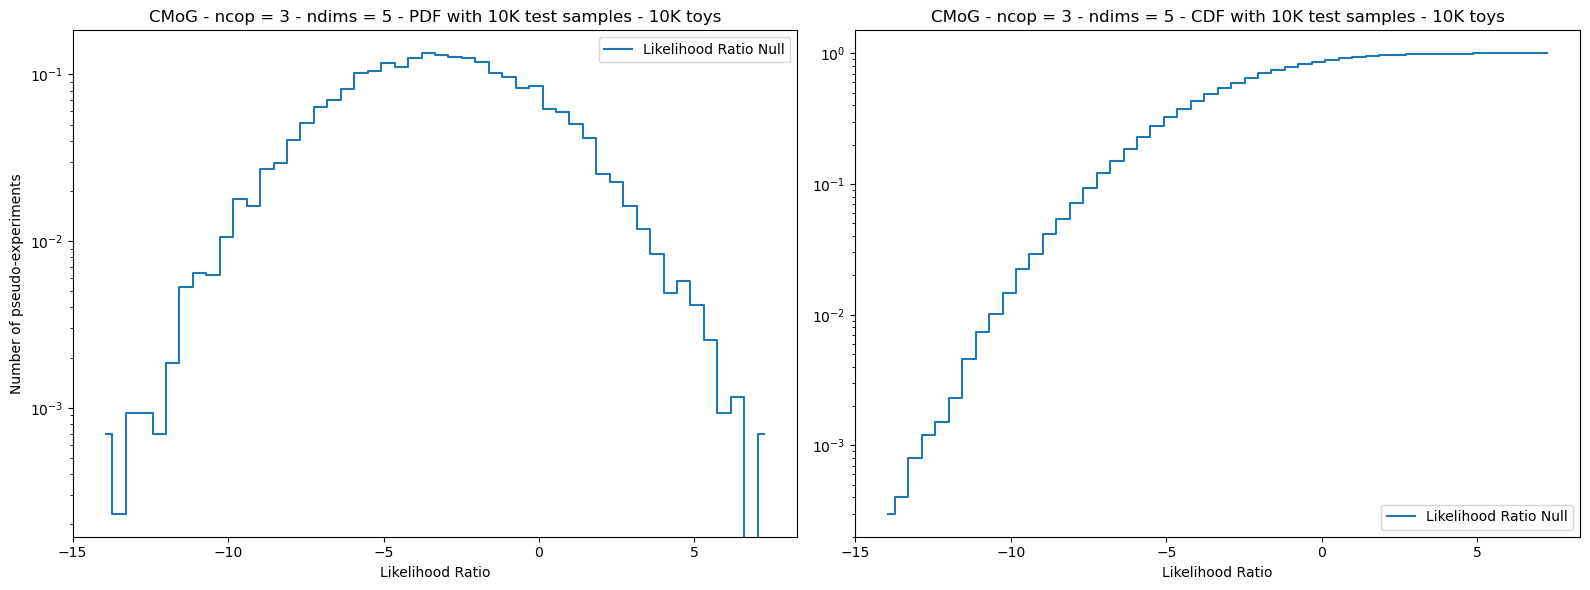

Time elapsed: 0.6806305702775717 seconds.


In [ ]:
start = timer()

nsamples = LRMetric.Inputs.batch_size_test
niter = LRMetric.Inputs.niter
ns = nsamples**2 /(2*nsamples)

scale = 'log'
num_bins = 50  # number of bins|
dist_null = np.array(LRMetric.Results[-1].result_value["lik_ratio_norm_list"])*np.sqrt(ns)
# Compute the mean and standard deviation of the sample and their standard errors
mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
# Minimum and maximum x values
min_x = min(dist_null) # lower limit of the binning
max_x = max(dist_null) # upper limit of the binning
# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)
# Create histogram for values and normalize counts to sum to 1
counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
cum_counts = np.cumsum(counts)/np.sum(counts)
# Get the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
# Calculate the theoretical PDF and CDF of the KS distribution for each x value
#theoretical_pdf_ks = kstwobign.pdf(x)
#theoretical_cdf_ks = kstwobign.cdf(x)

# Empirical SKS Normal
#empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
#empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
# Draw the first plot
ax[0].plot(bin_centers, counts, linestyle = '-', label='Likelihood Ratio Null', drawstyle='steps-mid')
#ax[0].plot(x, theoretical_pdf_ks, label='Theoretical distribution (KS)')
#ax[0].plot(x, empirical_pdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[0].set_yscale(scale)
#ax[0].set_xlim(-300,-100)
#ax[0].set_ylim(0.00001, 0.02)
ax[0].set_xlabel('Likelihood Ratio')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - PDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[0].legend(loc='upper right')
# Draw the second plot
ax[1].plot(bin_centers, cum_counts, linestyle = '-', label='Likelihood Ratio Null', drawstyle='steps-mid')
#ax[1].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
#ax[1].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[1].set_yscale(scale)
#ax[1].set_xlim(-300,-100)
#ax[1].set_ylim(9e-4, 1.5)
ax[1].set_xlabel('Likelihood Ratio')
ax[1].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[1].legend(loc='lower right')
## Draw the third plot
#ax[2].plot(bin_centers, cum_counts, linestyle = '-', label='FN Null', drawstyle='steps-mid')
##ax[2].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
##ax[2].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
#ax[2].set_yscale(scale)
#ax[2].set_xlim(0.25, 2)
#ax[2].set_ylim(0.8, 1)
#ax[2].set_xlabel('KS vs SKS')
#ax[2].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
#ax[2].legend(loc='lower right')
# Adjust the width space
plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
# Display the figure with the two subplots
plt.tight_layout()
#plt.savefig(results_path+'SKS_nsamples_'+str(nsamples)+'_ndims_'+'_'+str(ndims)+'_niter_'+str(niter)+'.pdf')
plt.show()
plt.close()
end = timer()
print("Time elapsed:", end-start, "seconds.")

In [ ]:
cl_list = [0.68, 0.95, 0.99]
[[cl, [int(cl*len(dist_null)), int((1-cl)*len(dist_null))], np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]

[[0.68, [6800, 3199], -1.8054356934517268],
 [0.95, [9500, 500], 1.7269475633248532],
 [0.99, [9900, 100], 3.8596137612172567]]

In [ ]:
seed = 0
ncomp = 3
ndims = 5
eps = 0.000129
eps_loc = 10*eps
eps_scale = eps
dist_1 = MixtureDistributions.MixtureGaussian(ncomp, ndims, 0., 0., seed)
dist_2 = MixtureDistributions.MixtureGaussian(ncomp, ndims, eps_loc, eps_scale, seed)
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = 10,
                                                   batch_size_test = 10_000,
                                                   batch_size_gen = 100,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             null_test=False,
                             verbose = True)
LRMetric.Test_tf()
LRMetric.Results[-1].result_value

Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Setting dist_num from dist_symb.


Setting dist_num from dist_symb.
To run under the null hypothesis, set the `null_test` attribute to True.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10
batch_size = 10000
LR metric calculation completed in 5.614698325283825 seconds.


{'logprob_ref_ref_sum_list': array([-26323.43892025, -26338.13871412, -26410.96420995, -26552.47483623,
        -26009.27182095, -26356.5578978 , -26635.53715761, -25999.13544257,
        -26068.22485645, -26277.71193775]),
 'logprob_ref_alt_sum_list': array([-26118.15551017, -26164.3891699 , -26208.1627619 , -26223.00549925,
        -26725.71349401, -26383.65527918, -26948.36073883, -26306.91453948,
        -26428.51429243, -26328.52068525]),
 'logprob_alt_alt_sum_list': array([-26112.45832133, -26164.63551897, -26206.4721818 , -26221.51280242,
        -26722.19821205, -26383.52890402, -26946.81014953, -26306.64045914,
        -26430.02762975, -26328.83684636]),
 'lik_ratio_list': array([11.39437769, -0.49269814,  3.38116019,  2.98539366,  7.03056392,
         0.25275032,  3.10117859,  0.54816066, -3.02667463, -0.63232223]),
 'lik_ratio_norm_list': array([ 0.11394378, -0.00492698,  0.0338116 ,  0.02985394,  0.07030564,
         0.0025275 ,  0.03101179,  0.00548161, -0.03026675, -0.006

In [ ]:
np.mean(LRMetric.Results[-1].result_value["lik_ratio_norm_list"])*np.sqrt(ns)

1.735373687262832

## LR Test (99% CL)

In [ ]:
seed = 0
ncomp = 3
ndims = 5
eps = 0.000164
eps_loc = 10*eps
eps_scale = eps
dist_1 = MixtureDistributions.MixtureGaussian(ncomp, ndims, 0., 0., seed)
dist_2 = MixtureDistributions.MixtureGaussian(ncomp, ndims, eps_loc, eps_scale, seed)
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = 10_000,
                                                   batch_size_test = 10_000,
                                                   batch_size_gen = 100,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             null_test=True,
                             verbose = True)

Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.


In [ ]:
LRMetric.Test_tf()
LRMetric.Results[-1].result_value


------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 10000
LR metric calculation completed in 1440.2184292739257 seconds.


{'logprob_ref_ref_sum_list': array([-26323.43892025, -26338.13871412, -26410.96420995, ...,
        -26414.61320193, -26051.01197648, -26070.38371944]),
 'logprob_ref_alt_sum_list': array([-26119.44929672, -26171.75648107, -26213.63406758, ...,
        -26145.33669568, -26199.68479434, -26171.97875077]),
 'logprob_alt_alt_sum_list': array([-26118.58683487, -26178.78691354, -26218.28600056, ...,
        -26146.4472976 , -26205.60443128, -26175.61106773]),
 'lik_ratio_list': array([  1.72492369, -14.06086495,  -9.30386596, ...,  -2.22120383,
        -11.83927387,  -7.26463392]),
 'lik_ratio_norm_list': array([ 0.01724924, -0.14060865, -0.09303866, ..., -0.02221204,
        -0.11839274, -0.07264634])}

In [ ]:
#LRMetric.Results.load_from_json(null_hypotheses_dir+"Null_5D_LR_eps_00001635.json")
LRMetric.Results.save_to_json(null_hypotheses_dir+"Null_5D_LR_eps_0000164.json")

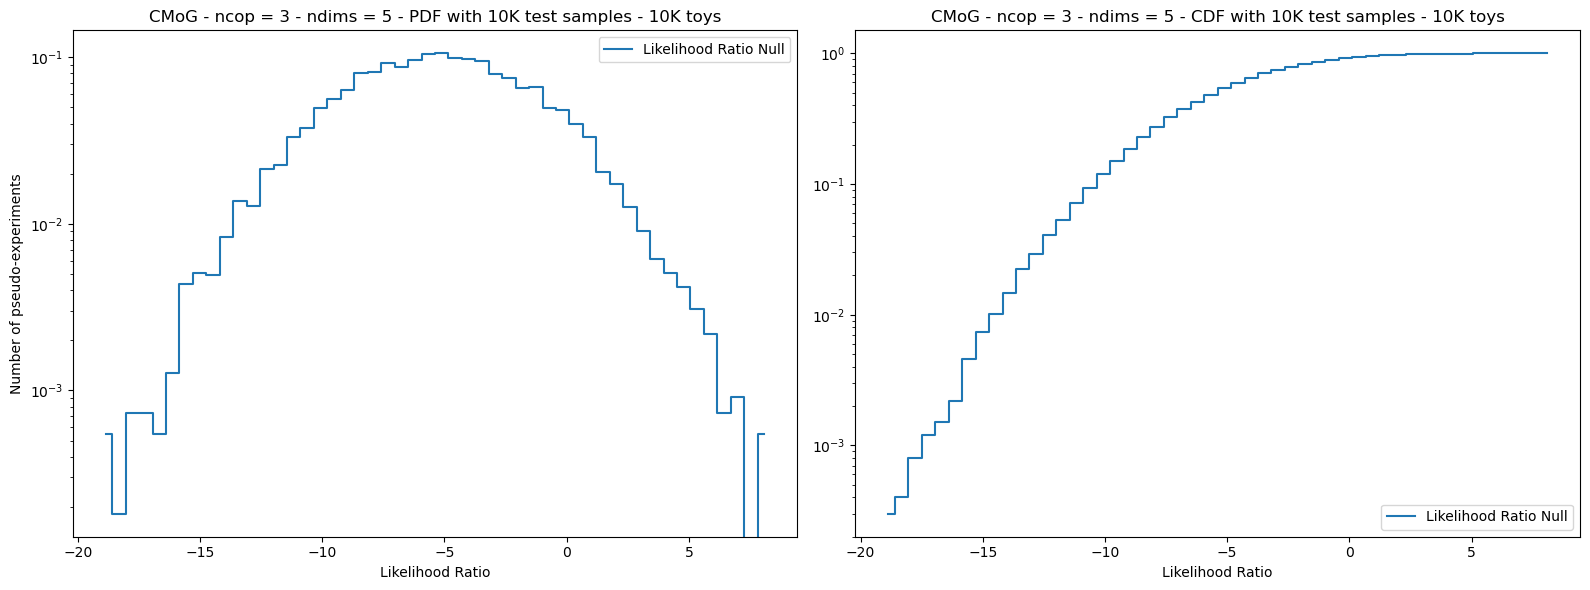

Time elapsed: 0.6172770792618394 seconds.


In [ ]:
start = timer()

nsamples = LRMetric.Inputs.batch_size_test
niter = LRMetric.Inputs.niter
ns = nsamples**2 /(2*nsamples)

scale = 'log'
num_bins = 50  # number of bins|
dist_null = np.array(LRMetric.Results[-1].result_value["lik_ratio_norm_list"])*np.sqrt(ns)
# Compute the mean and standard deviation of the sample and their standard errors
mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
# Minimum and maximum x values
min_x = min(dist_null) # lower limit of the binning
max_x = max(dist_null) # upper limit of the binning
# Create an array of values
x = np.linspace(min_x, max_x, num_bins + 1)
# Create histogram for values and normalize counts to sum to 1
counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
cum_counts = np.cumsum(counts)/np.sum(counts)
# Get the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
# Calculate the theoretical PDF and CDF of the KS distribution for each x value
#theoretical_pdf_ks = kstwobign.pdf(x)
#theoretical_cdf_ks = kstwobign.cdf(x)

# Empirical SKS Normal
#empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
#empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
# Set up the figure and the two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
# Draw the first plot
ax[0].plot(bin_centers, counts, linestyle = '-', label='Likelihood Ratio Null', drawstyle='steps-mid')
#ax[0].plot(x, theoretical_pdf_ks, label='Theoretical distribution (KS)')
#ax[0].plot(x, empirical_pdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[0].set_yscale(scale)
#ax[0].set_xlim(-300,-100)
#ax[0].set_ylim(0.00001, 0.02)
ax[0].set_xlabel('Likelihood Ratio')
ax[0].set_ylabel('Number of pseudo-experiments')
ax[0].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - PDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[0].legend(loc='upper right')
# Draw the second plot
ax[1].plot(bin_centers, cum_counts, linestyle = '-', label='Likelihood Ratio Null', drawstyle='steps-mid')
#ax[1].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
#ax[1].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
ax[1].set_yscale(scale)
#ax[1].set_xlim(-300,-100)
#ax[1].set_ylim(9e-4, 1.5)
ax[1].set_xlabel('Likelihood Ratio')
ax[1].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
ax[1].legend(loc='lower right')
## Draw the third plot
#ax[2].plot(bin_centers, cum_counts, linestyle = '-', label='FN Null', drawstyle='steps-mid')
##ax[2].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
##ax[2].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
#ax[2].set_yscale(scale)
#ax[2].set_xlim(0.25, 2)
#ax[2].set_ylim(0.8, 1)
#ax[2].set_xlabel('KS vs SKS')
#ax[2].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys')
#ax[2].legend(loc='lower right')
# Adjust the width space
plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
# Display the figure with the two subplots
plt.tight_layout()
#plt.savefig(results_path+'SKS_nsamples_'+str(nsamples)+'_ndims_'+'_'+str(ndims)+'_niter_'+str(niter)+'.pdf')
plt.show()
plt.close()
end = timer()
print("Time elapsed:", end-start, "seconds.")

In [ ]:
cl_list = [0.68, 0.95, 0.99]
[[cl, [int(cl*len(dist_null)), int((1-cl)*len(dist_null))], np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]

[[0.68, [6800, 3199], -3.4133923397301884],
 [0.95, [9500, 500], 1.089049430842976],
 [0.99, [9900, 100], 3.799240150262074]]

In [ ]:
seed = 0
ncomp = 3
ndims = 5
eps = 0.000164
eps_loc = 10*eps
eps_scale = eps
dist_1 = MixtureDistributions.MixtureGaussian(ncomp, ndims, 0., 0., seed)
dist_2 = MixtureDistributions.MixtureGaussian(ncomp, ndims, eps_loc, eps_scale, seed)
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = 10,
                                                   batch_size_test = 10_000,
                                                   batch_size_gen = 100,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             null_test=False,
                             verbose = True)
LRMetric.Test_tf()
LRMetric.Results[-1].result_value

Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.


Checking and setting numerical distributions.
Setting dist_num from dist_symb.
Setting dist_num from dist_symb.
To run under the null hypothesis, set the `null_test` attribute to True.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10
batch_size = 10000
LR metric calculation completed in 6.10512091498822 seconds.


{'logprob_ref_ref_sum_list': array([-26323.43892025, -26338.13871412, -26410.96420995, -26552.47483623,
        -26009.27182095, -26356.5578978 , -26635.53715761, -25999.13544257,
        -26068.22485645, -26277.71193775]),
 'logprob_ref_alt_sum_list': array([-26118.56448117, -26163.18850175, -26207.48728545, -26222.27585643,
        -26725.53827988, -26382.55881029, -26947.65853257, -26305.85684315,
        -26426.97206382, -26327.30466068]),
 'logprob_alt_alt_sum_list': array([-26110.56037402, -26162.70223468, -26204.52779286, -26219.61737666,
        -26720.32105349, -26381.60002624, -26944.89840445, -26304.69828797,
        -26428.10207059, -26326.91485399]),
 'lik_ratio_list': array([16.00821429,  0.97253414,  5.91898518,  5.31695954, 10.43445279,
         1.91756811,  5.52025623,  2.31711037, -2.26001355,  0.77961338]),
 'lik_ratio_norm_list': array([ 0.16008214,  0.00972534,  0.05918985,  0.0531696 ,  0.10434453,
         0.01917568,  0.05520256,  0.0231711 , -0.02260014,  0.007

In [ ]:
np.mean(LRMetric.Results[-1].result_value["lik_ratio_norm_list"])*np.sqrt(ns)

3.318146687649161

# Backup

In [ ]:
seed = 0
for ncomp in [3]:
    for nsamples in [1000, 10_000, 100000]:
        for ndims in [4, 8, 16, 32, 64]:
            start = timer()
            result_dict = {}
            seed = seed + 1
            result_dict['ncomp'] = ncomp
            result_dict['ndims'] = ndims
            result_dict['seed'] = seed
            result_dict['nsamples'] = nsamples
            dist = MixtureGaussian(ncomp,ndims,seed)
            niter = 10000
            ns = nsamples**2 /(2*nsamples)
            result_dict['niter'] = niter
            result_dict['ns'] = ns
            sks_means_10, sks_stds_10, sks_dists_10 = [], [], []
            sks_means_100, sks_stds_100, sks_dists_100 = [], [], []
            sks_means_300, sks_stds_300, sks_dists_300 = [], [], []
            sks_means_1000, sks_stds_1000, sks_dists_1000 = [], [], []
            data_mean_cov = []
            s = dist.sample(2*nsamples)
            s1, s2 = s[:nsamples], s[nsamples:]
            _, _, _, sliced_data1_cov_10, _ = sks_2samp_tf(s1,s2, nslices = 10, cov = True) # type: ignore
            _, _, _, sliced_data1_cov_100, _ = sks_2samp_tf(s1,s2, nslices = 100, cov = True) # type: ignore
            _, _, _, sliced_data1_cov_300, _ = sks_2samp_tf(s1,s2, nslices = 300, cov = True) # type: ignore
            _, _, _, sliced_data1_cov_1000, _ = sks_2samp_tf(s1,s2, nslices = 1000, cov = True) # type: ignore
            for i in tqdm(range(niter)):
                s = dist.sample(2*nsamples)
                s1, s2 = s[:nsamples], s[nsamples:]
                sks_mean_1000, sks_std_1000, sks_proj_1000, _, _ = sks_2samp_tf(s1,s2, nslices = 1000, cov = False) # type: ignore
                sks_proj_10 = sks_proj_1000[:10]; sks_mean_10 = tf.reduce_mean(sks_proj_10); sks_std_10 = tf.math.reduce_std(sks_proj_10)
                sks_proj_100 = sks_proj_1000[:100]; sks_mean_100 = tf.reduce_mean(sks_proj_100); sks_std_100 = tf.math.reduce_std(sks_proj_100)
                sks_proj_300 = sks_proj_1000[:300]; sks_mean_300 = tf.reduce_mean(sks_proj_300); sks_std_300 = tf.math.reduce_std(sks_proj_300)
                sks_means_10.append(sks_mean_10); sks_stds_10.append(sks_std_10); sks_dists_10.append(sks_proj_10)
                sks_means_100.append(sks_mean_100); sks_stds_100.append(sks_std_100); sks_dists_100.append(sks_proj_100)
                sks_means_300.append(sks_mean_300); sks_stds_300.append(sks_std_300); sks_dists_300.append(sks_proj_300)
                sks_means_1000.append(sks_mean_1000); sks_stds_1000.append(sks_std_1000); sks_dists_1000.append(sks_proj_1000)
            data_mean_cov = tf.sqrt(tf.reduce_mean(tfp.stats.covariance(s1, sample_axis=0, event_axis=-1))).numpy()
            sliced_data_mean_cov_10 = tf.sqrt(tf.reduce_mean(sliced_data1_cov_10)).numpy()
            sliced_data_mean_cov_100 = tf.sqrt(tf.reduce_mean(sliced_data1_cov_100)).numpy()
            sliced_data_mean_cov_300 = tf.sqrt(tf.reduce_mean(sliced_data1_cov_300)).numpy()
            sliced_data_mean_cov_1000 = tf.sqrt(tf.reduce_mean(sliced_data1_cov_1000)).numpy()
            sks_means_10 = tf.stack(sks_means_10).numpy(); sks_stds_10 = tf.stack(sks_stds_10).numpy(); sks_dists_10 = tf.stack(sks_dists_10).numpy()
            sks_means_100 = tf.stack(sks_means_100).numpy(); sks_stds_100 = tf.stack(sks_stds_100).numpy(); sks_dists_100 = tf.stack(sks_dists_100).numpy()
            sks_means_300 = tf.stack(sks_means_300).numpy(); sks_stds_300 = tf.stack(sks_stds_300).numpy(); sks_dists_300 = tf.stack(sks_dists_300).numpy()
            sks_means_1000 = tf.stack(sks_means_1000).numpy(); sks_stds_1000 = tf.stack(sks_stds_1000).numpy(); sks_dists_1000 = tf.stack(sks_dists_1000).numpy()
            result_dict['10'] = {'sliced_data_mean_cov': sliced_data_mean_cov_10, 'sks_means': sks_means_10, 'sks_stds': sks_stds_10, 'mu': tf.math.reduce_mean(sks_means_10*np.sqrt(ns)).numpy(), 'sigma': tf.math.reduce_std(sks_means_10*np.sqrt(ns)).numpy()}
            result_dict['100'] = {'sliced_data_mean_cov': sliced_data_mean_cov_100, 'sks_means': sks_means_100, 'sks_stds': sks_stds_100, 'mu': tf.math.reduce_mean(sks_means_100*np.sqrt(ns)).numpy(), 'sigma': tf.math.reduce_std(sks_means_100*np.sqrt(ns)).numpy()}
            result_dict['300'] = {'sliced_data_mean_cov': sliced_data_mean_cov_300, 'sks_means': sks_means_300, 'sks_stds': sks_stds_300, 'mu': tf.math.reduce_mean(sks_means_300*np.sqrt(ns)).numpy(), 'sigma': tf.math.reduce_std(sks_means_300*np.sqrt(ns)).numpy()}
            result_dict['1000'] = {'sliced_data_mean_cov': sliced_data_mean_cov_1000, 'sks_means': sks_means_1000, 'sks_stds': sks_stds_1000, 'mu': tf.math.reduce_mean(sks_means_1000*np.sqrt(ns)).numpy(), 'sigma': tf.math.reduce_std(sks_means_1000*np.sqrt(ns)).numpy()}
            
            dict_to_save = Utils.convert_types_dict(result_dict)
            with codecs.open(results_path+'SKS_nsamples_'+str(nsamples)+'_ndims_'+'_'+str(ndims)+'_niter_'+str(niter)+'.json', "w", encoding="utf-8") as f:
                json.dump(dict_to_save, f, separators=(",", ":"), indent=4)
    
            print("================== ncomp =", ncomp, "ndims =", ndims, "==================")
            print(f"The square root of the mean covariance of the data is {data_mean_cov}")
            print(f"The square root of the mean covariance of the sliced data (10 slices) is {tf.sqrt(tf.reduce_mean(sliced_data1_cov_10))}")
            print(f"The square root of the mean covariance of the sliced data (100 slices) is {tf.sqrt(tf.reduce_mean(sliced_data1_cov_100))}")
            print(f"The square root of the mean covariance of the sliced data (300 slices) is {tf.sqrt(tf.reduce_mean(sliced_data1_cov_300))}")
            print(f"The square root of the mean covariance of the sliced data (1000 slices) is {tf.sqrt(tf.reduce_mean(sliced_data1_cov_1000))}")
            print(f"The estimated mean and variance (10 slices) of the (scaled) SKS statistic are {tf.math.reduce_mean(sks_means_10*np.sqrt(ns))} and {tf.math.reduce_std(sks_means_10*np.sqrt(ns))}")
            print(f"The estimated mean and variance (100 slices) of the (scaled) SKS statistic are {tf.math.reduce_mean(sks_means_100*np.sqrt(ns))} and {tf.math.reduce_std(sks_means_100*np.sqrt(ns))}")
            print(f"The estimated mean and variance (300 slices) of the (scaled) SKS statistic are {tf.math.reduce_mean(sks_means_300*np.sqrt(ns))} and {tf.math.reduce_std(sks_means_300*np.sqrt(ns))}")
            print(f"The estimated mean and variance (1000 slices) of the (scaled) SKS statistic are {tf.math.reduce_mean(sks_means_1000*np.sqrt(ns))} and {tf.math.reduce_std(sks_means_1000*np.sqrt(ns))}")
            print(f"The ratio of the estimated variance (10 slices) of the (scaled) SKS statistic to the square root of the mean covariance of the sliced data is {tf.math.reduce_std(sks_means_10*np.sqrt(ns))/sliced_data_mean_cov_10}")
            print(f"The ratio of the estimated variance (100 slices) of the (scaled) SKS statistic to the square root of the mean covariance of the sliced data is {tf.math.reduce_std(sks_means_100*np.sqrt(ns))/sliced_data_mean_cov_100}")
            print(f"The ratio of the estimated variance (300 slices) of the (scaled) SKS statistic to the square root of the mean covariance of the sliced data is {tf.math.reduce_std(sks_means_300*np.sqrt(ns))/sliced_data_mean_cov_300}")
            print(f"The ratio of the estimated variance (1000 slices) of the (scaled) SKS statistic to the square root of the mean covariance of the sliced data is {tf.math.reduce_std(sks_means_1000*np.sqrt(ns))/sliced_data_mean_cov_1000}")

            scale = 'log'
            num_bins = 50  # number of bins|

            d0 = sks_dists_100[:,0]*np.sqrt(ns)
            d10 = np.mean(sks_dists_10,axis=1)*np.sqrt(ns)
            d100 = np.mean(sks_dists_100,axis=1)*np.sqrt(ns)
            d300 = np.mean(sks_dists_300,axis=1)*np.sqrt(ns)
            d1000 = np.mean(sks_dists_1000,axis=1)*np.sqrt(ns)

            # Compute the mean and standard deviation of the sample and their standard errors
            mu0, deltamu0, sigma0, deltasigma0 = (np.mean(d0), se_mean(d0), np.std(d0), se_std(d0))
            mu10, deltamu10, sigma10, deltasigma10 = (np.mean(d10), se_mean(d10), np.std(d10), se_std(d10))
            mu100, deltamu100, sigma100, deltasigma100 = (np.mean(d100), se_mean(d100), np.std(d100), se_std(d100))
            mu300, deltamu300, sigma300, deltasigma300 = (np.mean(d300), se_mean(d300), np.std(d300), se_std(d300))
            mu1000, deltamu1000, sigma1000, deltasigma1000 = (np.mean(d1000), se_mean(d1000), np.std(d1000), se_std(d1000))

            # Minimum and maximum x values
            min_x = min(d0) # lower limit of the binning
            max_x = max(d0) # upper limit of the binning

            # Create an array of values
            x = np.linspace(min_x, max_x, num_bins + 1)

            # Create histogram for values and normalize counts to sum to 1
            counts0, bin_edges0 = np.histogram(d0, bins=x, density=True); cum_counts0 = np.cumsum(counts0)/np.sum(counts0)
            counts10, bin_edges10 = np.histogram(d10, bins=x, density=True); cum_counts10 = np.cumsum(counts10)/np.sum(counts10)
            counts100, bin_edges100 = np.histogram(d100, bins=x, density=True); cum_counts100 = np.cumsum(counts100)/np.sum(counts100)
            counts300, bin_edges300 = np.histogram(d300, bins=x, density=True); cum_counts300 = np.cumsum(counts300)/np.sum(counts300)
            counts1000, bin_edges1000 = np.histogram(d1000, bins=x, density=True); cum_counts1000 = np.cumsum(counts1000)/np.sum(counts1000)

            # Get the bin centers
            bin_centers0 = (bin_edges0[:-1] + bin_edges0[1:]) / 2
            bin_centers10 = (bin_edges10[:-1] + bin_edges10[1:]) / 2
            bin_centers100 = (bin_edges100[:-1] + bin_edges100[1:]) / 2
            bin_centers300 = (bin_edges300[:-1] + bin_edges300[1:]) / 2
            bin_centers1000 = (bin_edges1000[:-1] + bin_edges1000[1:]) / 2

            # Calculate the theoretical PDF and CDF of the KS distribution for each x value
            theoretical_pdf_ks = kstwobign.pdf(x)
            theoretical_cdf_ks = kstwobign.cdf(x)

            ## Fit SKS to normal
            #def normal_pdf(x, mu, sigma):
            #    return norm.pdf(x, loc=mu, scale=sigma)
            #params_norm, cov_norm = curve_fit(normal_pdf, bin_centers2, counts2, p0=[mu2, sigma2])
            #loc_fit_norm, sigma_fit_norm = params_norm
            #
            ## Calculate the theoretical PDF and CDF of the Normal distribution for each x value
            #empirical_pdf_norm_1 = norm.pdf(x, loc=loc_fit_norm, scale=sigma_fit_norm)
            #empirical_cdf_norm_1 = norm.cdf(x, loc=loc_fit_norm, scale=sigma_fit_norm)
            #
            ## Fit SKS to log-normal
            #def lognormal_pdf(x, scale, s):
            #    return lognorm.pdf(x, scale=scale, s=s)
            #params, cov = curve_fit(lognormal_pdf, bin_centers2, counts2, p0=[mu2, sigma2])
            #scale_fit_lognorm, s_fit_lognorm = params
            #
            #empirical_pdf_lognorm_1 = lognorm.pdf(x, scale=scale_fit_lognorm, s=s_fit_lognorm)
            #empirical_cdf_lognorm_1 = lognorm.cdf(x, scale=scale_fit_lognorm, s=s_fit_lognorm)
            
            # Empirical SKS Normal
            empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=0.155)
            empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=0.155)

            # Set up the figure and the two subplots
            fig, ax = plt.subplots(1, 3, figsize=(25, 6))

            # Draw the first plot
            ax[0].plot(bin_centers0, counts0, linestyle = '-', label='Expected KS', drawstyle='steps-mid')
            ax[0].plot(bin_centers10, counts10, linestyle = '-', label='SKS (10 slices)', drawstyle='steps-mid')
            ax[0].plot(bin_centers100, counts100, linestyle = '-', label='SKS (100 slices)', drawstyle='steps-mid')
            ax[0].plot(bin_centers300, counts300, linestyle = '-', label='SKS (300 slices)', drawstyle='steps-mid')
            ax[0].plot(bin_centers1000, counts1000, linestyle = '-', label='SKS (1000 slices)', drawstyle='steps-mid')
            ax[0].plot(x, theoretical_pdf_ks, label='Theoretical distribution (KS)')
            ax[0].plot(x, empirical_pdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
            #ax[0].plot(x, empirical_pdf_lognorm_1, label='SKS - Log-Normal fit with scale='+str(round(scale_fit_lognorm,3))+', s='+str(round(s_fit_lognorm,3)))
            ax[0].set_yscale(scale)
            ax[0].set_xlim(0.25, 2)
            ax[0].set_ylim(1e-1, 10)
            ax[0].set_xlabel('KS vs SKS')
            ax[0].set_ylabel('Number of pseudo-experiments')
            ax[0].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - PDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys - 100 slices')
            ax[0].legend(loc='upper right')

            # Draw the second plot
            ax[1].plot(bin_centers0, cum_counts0, linestyle = '-', label='Expected KS', drawstyle='steps-mid')
            ax[1].plot(bin_centers10, cum_counts10, linestyle = '-', label='SKS (10 slices)', drawstyle='steps-mid')
            ax[1].plot(bin_centers100, cum_counts100, linestyle = '-', label='SKS (100 slices)', drawstyle='steps-mid')
            ax[1].plot(bin_centers300, cum_counts300, linestyle = '-', label='SKS (300 slices)', drawstyle='steps-mid')
            ax[1].plot(bin_centers1000, cum_counts1000, linestyle = '-', label='SKS (1000 slices)', drawstyle='steps-mid')
            ax[1].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
            ax[1].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
            ax[1].set_yscale(scale)
            ax[1].set_xlim(0.25, 2)
            ax[1].set_ylim(9e-4, 1.5)
            ax[1].set_xlabel('KS vs SKS')
            ax[1].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys - 100 slices')
            ax[1].legend(loc='lower right')

            # Draw the third plot
            ax[2].plot(bin_centers0, cum_counts0, linestyle = '-', label='Expected KS', drawstyle='steps-mid')
            ax[2].plot(bin_centers10, cum_counts10, linestyle = '-', label='SKS (10 slices)', drawstyle='steps-mid')
            ax[2].plot(bin_centers100, cum_counts100, linestyle = '-', label='SKS (100 slices)', drawstyle='steps-mid')
            ax[2].plot(bin_centers300, cum_counts300, linestyle = '-', label='SKS (300 slices)', drawstyle='steps-mid')
            ax[2].plot(x, theoretical_cdf_ks, label='Theoretical distribution (KS)')
            ax[2].plot(x, empirical_cdf_norm, label='SKS - Normal approximation $\\mu =$'+str(kstwobign.mean())+', $\\sigma =$'+str(0.155))
            #ax[2].plot(x, empirical_cdf_lognorm_1, label='SKS - SKS - Log-Normal fit with scale='+str(round(scale_fit_lognorm,3))+', s='+str(round(s_fit_lognorm,3)))
            ax[2].set_yscale(scale)
            ax[2].set_xlim(0.25, 2)
            ax[2].set_ylim(0.8, 1)
            ax[2].set_xlabel('KS vs SKS')
            ax[2].set_title('CMoG - ncop = '+str(ncomp)+' - ndims = '+str(ndims)+' - CDF with '+str(int(nsamples/1000))+'K test samples - '+str(int(niter/1000))+'K toys - 100 slices')
            ax[2].legend(loc='lower right')

            # Adjust the width space
            plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking

            # Display the figure with the two subplots
            plt.tight_layout()
            plt.savefig(results_path+'SKS_nsamples_'+str(nsamples)+'_ndims_'+'_'+str(ndims)+'_niter_'+str(niter)+'.pdf')
            plt.show()
            plt.close()
            end = timer()
            print("Time elapsed:", end-start, "seconds.")